- Revise that assumption. 
- Buying twice a year:
    - This is wrong. An 18-month window is more accurate. 
    - My ROQ must be too high. 
- Scale to a 12 month window. 
- Min doesn’t change - still lead-time based. 
- ROQ will be higher. 
- Get min with +15 and +30. 
- Test the Quantity as is. 
- Focus on Central Mins

Old Equation:

MIN = Month Usage + (Leadtime in Months * Average Monthly Usage)

ROQ = 2 * Monthly usage

Screen Shot 2022-03-02 at 1.48.36 PM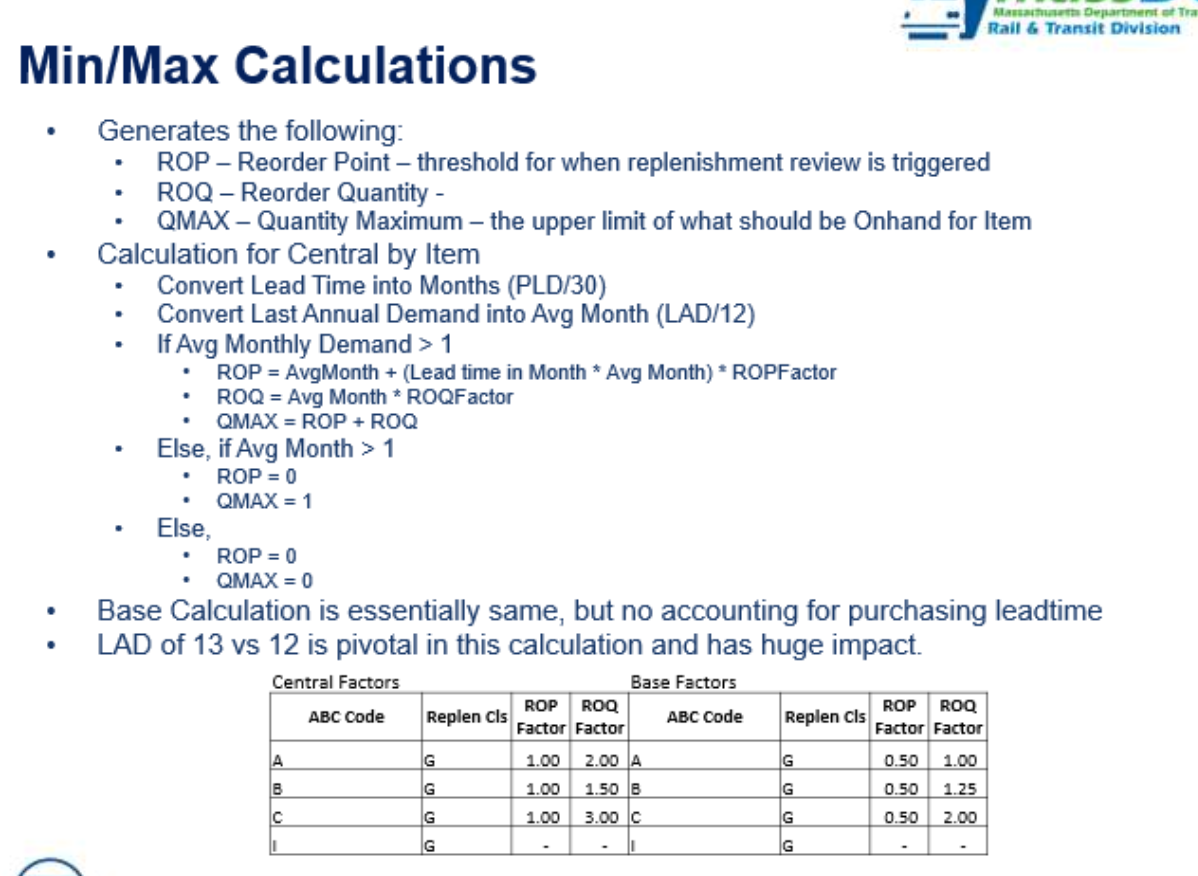

In [107]:
import pandas as pd
import numpy as np

import datetime
import os

import csv

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
os.chdir("/Users/pbenson/Documents/Min_Max_project/")

In [5]:
txn_converter = {'TXN - Transaction Type': str,
                 'TXN - Transaction Date': str,
                 'TXN - Item ID': str,
                 'TXN - Qty': float,
                 'TXN - Total Cost': float}

In [7]:
txn_df = pd.read_csv('Data/Raw_Data/full_transaction_df.csv', converters=txn_converter, index_col=0)

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_86237/93475808.py:1: DtypeWarning: Columns (4,7,18,19,20,21,28,34,37,41,45,48,49,51,55,57,58,59,60,67,68,70,71,72,74,76,78,79,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  txn_df = pd.read_csv('Data/Raw_Data/full_transaction_df.csv', converters=txn_converter, index_col=0)


In [8]:
txn_df

,TXN - Sequence Nbr,TXN - Transaction Type,TXN - Unit,TXN - Destination Unit,TXN - Transaction Date,TXN - Time Stamp,TXN - Order No,TXN - Item ID,TXN - Item Description,TXN - Qty,TXN - Avg Matl Cost,TXN - Total Cost,TXN - User ID,TXN - Storage Area,TXN - Storage Lev 1,TXN - Storage Lev 2,TXN - Storage Lev 3,TXN - Storage Lev 4,TXN - Adjust Type,TXN - Location Code,TXN - Ship To Name,TXN - Item Group,TXN - Utilization Type,TXN - UOM,TXN - Transaction Acct,TXN - Transaction Dept,TXN - Transaction Fund,TXN - Src BU,TXN - Order Line,TXN - Sched Line No,TXN - Demand Line No,TXN - Base Qty,TXN - Std UOM,TXN - Reason,TXN - Mode,TXN - Activity Code,TXN - PO No,TXN - PO Distrib Line,TXN - Distrib Seq,TXN - PO Price,TXN - Req ID,TXN - Req Line No,TXN - Req Sched No,TXN - Req Distr No,TXN - RMA Number,TXN - RMA Line No,TXN - RTV Vendor ID,TXN - Last Purch Date,TXN - PO Date,TXN - Trn Source,TXN - Comments,TXN - Item Short Desc,TXN - Fulfill State,TXN - Prior State at Cancel,TXN - Canceled Date,TXN - Fulfill Date,TXN - Fulfill Picked Date,TXN - Fulfill Orig Unit,TXN - Fulfill Dest Unit,TXN - Fulfill Req ID,TXN - Fulfill Req Line,TXN - Fulfill Req Sched,TXN - Fulfill Req Distr,TXN - Fulfill Qty Per,TXN - Fulfill Acct,TXN - Fulfill Fund,TXN - Fulfill Bud Ref,TXN - InterUnit Order ID,TXN - InterUnit Order Line,TXN - InterUnit Flag,TXN - InterUnit Status,TXN - Receipt No,TXN - Receipt Line,TXN - Hdr InterUnit Order ID,TXN - Hdr InterUnit Line,TXN - Recpt Type,TXN - Cost Element,TXN - Last Adj,TXN - Last Order,TXN - Last Date,TXN - Last Ptwy,TXN - Qty Avail,TXN - Qty Reserved,TXN - Qty Owned,TXN - Qty On Hand
0,1,041,BS011,NaN,2009/10/01,2009/10/01 15:45:28,NaN,05021408,"FITTING, 3/8 AIR BRAKE NYLON",-7.0,1.4210,-9.94,FODONNELL,C,10,F,1,NaN,D,NaN,NaN,00,I,EA,NaN,NaN,NaN,NaN,0,0,0,-7.0,EA,NaN,NaN,NaN,NaN,0,0,0.00,NaN,0,0,0,NaN,0,NaN,NaN,NaN,IN,NaN,"FITTING, 3",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,0,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,041,BS014,NaN,2009/10/01,2009/10/01 15:31:02,NaN,02545876,"USE 02592077 LAMP-HEAD, LOW BE",-16.0,3.5262,-56.41,FODONNELL,C,10,B,2,NaN,D,NaN,NaN,00,I,EA,NaN,NaN,NaN,NaN,0,0,0,-16.0,EA,NaN,NaN,NaN,NaN,0,0,0.00,NaN,0,0,0,NaN,0,NaN,NaN,NaN,IN,NaN,USE 025920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,0,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,041,BS011,NaN,2009/10/01,2009/10/01 15:44:30,NaN,00250066,CABLE-16 GAUGE BLACK AUTOMOTIV,-300.0,0.0933,-27.99,FODONNELL,O,FI,C,E,NaN,D,NaN,NaN,00,I,FT,NaN,NaN,NaN,NaN,0,0,0,-300.0,FT,NaN,NaN,NaN,NaN,0,0,0.00,NaN,0,0,0,NaN,0,NaN,NaN,NaN,IN,NaN,CABLE-16 G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,0,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,041,BS018,NaN,2009/10/01,2009/10/01 15:23:34,NaN,02063020,NUTS-NO 10-24 N.C.CO LD FORGED,-12.0,0.1840,-2.20,FODONNELL,C,12,C,5,NaN,D,NaN,NaN,00,I,EA,NaN,NaN,NaN,NaN,0,0,0,-12.0,EA,NaN,NaN,NaN,NaN,0,0,0.00,NaN,0,0,0,NaN,0,NaN,NaN,NaN,IN,NaN,NUTS-NO 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,0,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,020,CS001,NaN,2009/10/01,2009/10/01 11:31:51,NaN,04390100,ADAPTER HOSE - HYDR PUMP,15.0,64.2973,964.45,MMACDONALD,P,4,P,4,B,NaN,NaN,NaN,90,I,EA,2120200.0,841002.0,5.0,MBTAI,0,0,0,15.0,EA,NaN,0.0,1.0,2000044722.0,1,1,59.65,NaN,0,0,0,NaN,0,NaN,2009/10/01,2009/08/27,PO,NaN,AdapterHos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0000070558,1,NaN,0,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7266099,38,022,BS027,NaN,2020/06/30,2020/06/30 06:10:55,NaN,02440210,"Oil an

In [9]:
out_txns = txn_df.loc[txn_df['TXN - Transaction Type'] == '030']

In [10]:
out_txns['TXN - Transaction Date'] = pd.to_datetime(out_txns['TXN - Transaction Date'])
out_txns.rename(columns = {'TXN - Unit':'Base'}, inplace=True)

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_86237/3898840037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_txns['TXN - Transaction Date'] = pd.to_datetime(out_txns['TXN - Transaction Date'])
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_86237/3898840037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_txns.rename(columns = {'TXN - Unit':'Base'}, inplace=True)


In [11]:
out_txns.loc[out_txns['TXN - Item ID'] == '598742']

,TXN - Sequence Nbr,TXN - Transaction Type,Base,TXN - Destination Unit,TXN - Transaction Date,TXN - Time Stamp,TXN - Order No,TXN - Item ID,TXN - Item Description,TXN - Qty,TXN - Avg Matl Cost,TXN - Total Cost,TXN - User ID,TXN - Storage Area,TXN - Storage Lev 1,TXN - Storage Lev 2,TXN - Storage Lev 3,TXN - Storage Lev 4,TXN - Adjust Type,TXN - Location Code,TXN - Ship To Name,TXN - Item Group,TXN - Utilization Type,TXN - UOM,TXN - Transaction Acct,TXN - Transaction Dept,TXN - Transaction Fund,TXN - Src BU,TXN - Order Line,TXN - Sched Line No,TXN - Demand Line No,TXN - Base Qty,TXN - Std UOM,TXN - Reason,TXN - Mode,TXN - Activity Code,TXN - PO No,TXN - PO Distrib Line,TXN - Distrib Seq,TXN - PO Price,TXN - Req ID,TXN - Req Line No,TXN - Req Sched No,TXN - Req Distr No,TXN - RMA Number,TXN - RMA Line No,TXN - RTV Vendor ID,TXN - Last Purch Date,TXN - PO Date,TXN - Trn Source,TXN - Comments,TXN - Item Short Desc,TXN - Fulfill State,TXN - Prior State at Cancel,TXN - Canceled Date,TXN - Fulfill Date,TXN - Fulfill Picked Date,TXN - Fulfill Orig Unit,TXN - Fulfill Dest Unit,TXN - Fulfill Req ID,TXN - Fulfill Req Line,TXN - Fulfill Req Sched,TXN - Fulfill Req Distr,TXN - Fulfill Qty Per,TXN - Fulfill Acct,TXN - Fulfill Fund,TXN - Fulfill Bud Ref,TXN - InterUnit Order ID,TXN - InterUnit Order Line,TXN - InterUnit Flag,TXN - InterUnit Status,TXN - Receipt No,TXN - Receipt Line,TXN - Hdr InterUnit Order ID,TXN - Hdr InterUnit Line,TXN - Recpt Type,TXN - Cost Element,TXN - Last Adj,TXN - Last Order,TXN - Last Date,TXN - Last Ptwy,TXN - Qty Avail,TXN - Qty Reserved,TXN - Qty Owned,TXN - Qty On Hand
105302,142691000000001,030,CS003,NaN,2019-10-25,2019/10/25 08:18:12,MSR2409137,598742,"COMPRESSOR, AIR INLINE SR1983/",1.0,1.0,1.0,CGARCIA,C,03,G,5,NaN,NaN,081,Southampton St.,82,N,EA,NaN,NaN,NaN,CS003,1,1,1,1.0,EA,NaN,NaN,NaN,NaN,0,0,0.0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,IN,NaN,COMPRESSOR,70.0,NaN,NaN,NaN,2019/10/25 07:57:44,CS003,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,N,O,NaN,0,NaN,0,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
346656,195952700000001,030,CS003,NaN,2020-03-20,2020/03/20 09:16:49,MSR2486987,598742,"COMPRESSOR, AIR INLINE SR1983/",2.0,1.0,2.0,CGARCIA,CC,07,C,1,NaN,NaN,107.0,CABOT GARAGE,82,N,EA,NaN,NaN,NaN,CS003,1,1,1,2.0,EA,NaN,NaN,NaN,NaN,0,0,0.0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,IN,NaN,COMPRESSOR,70.0,NaN,NaN,NaN,2020/03/20 09:15:30,CS003,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,N,O,NaN,0,NaN,0,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304916,123073700000001,030,CS003,NaN,2018-11-27,2018/11/27 09:52:43,MSR2227099,598742,"COMPRESSOR, AIR INLINE SR1983/",3.0,1.0,3.0,CGARCIA,C,03,G,5,NaN,NaN,107,CABOT GARAGE,82,N,EA,NaN,NaN,NaN,CS003,1,1,1,3.0,EA,NaN,NaN,NaN,NaN,0,0,0.0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,IN,NaN,COMPRESSOR,70.0,NaN,NaN,NaN,2018/11/27 09:50:59,CS003,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,N,O,NaN,0,NaN,0,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1304917,123073700000002,030,CS003,NaN,2018-11-27,2018/11/27 09:52:43,MSR2227099,598742,"COMPRESSOR, AIR INLINE SR1983/",1.0,1.0,1.0,CGARCIA,C,03,J,4,NaN,NaN,107,CABOT GARAGE,82,N,EA,NaN,NaN,NaN,CS003,2,1,1,1.0,EA,NaN,NaN,NaN,NaN,0,0,0.0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,IN,NaN,COMPRESSOR,70.0,NaN,NaN,NaN,2018/11/27 09:50:59,CS003,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,N,O,NaN,0,NaN,0,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1844878,106115900000001,030,CS003,NaN,2021-01-05,2021/01/05 10:05:31,MSR2610840,598742,"COMPRESSOR, AIR INLINE SR1983/",2.0,1.0,2.0,CGARCIA,EV,D2,17,L3,0,NaN,107,CABOT GARAGE,82,N,EA,NaN,NaN,NaN,CS003,1,1,1,2.0,EA,NaN,NaN,NaN,NaN,0,0,0.0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,IN,NaN,COMPRESSOR,70.0,NaN,NaN,NaN,2021/01/05 10:04:41,CS003,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,N,O,NaN,0,NaN,0,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850374,106960000000001,030,CS003,NaN,2021-01-07,2021/01/07 06:20:59,MSR2611847,598742,"COMPRESSOR, AIR INLINE SR1983/",2.0,1.0,2.0,CGARCIA,EV,D2,15,L4,0,NaN,155,EVERETT AUTO. COMP. EXCHANGE,82,N,EA,NaN,NaN,NaN,CS003,1,1,1,2.0,EA,NaN,NaN,NaN,NaN,0,0,0

In [12]:
last_2_years = out_txns.copy(deep=True)

last_2_years['Today'] = datetime.datetime(2022, 1, 1)
last_2_years['Today'] = pd.to_datetime(last_2_years['Today'])
last_2_years['Years Ago'] = (last_2_years['TXN - Transaction Date'] - last_2_years['Today']).astype('timedelta64[Y]').astype('int')

# Need to find the usage in the past 2 years.
last_2_years_df = last_2_years.copy(deep=True)

last_2_years_df = last_2_years_df.loc[last_2_years_df['Years Ago'] >= -2]

print(last_2_years_df['Years Ago'].min())

part_usages = last_2_years_df.groupby('TXN - Item ID').size()
part_filter = part_usages > 5
in_parts = set(part_usages[part_filter].index)
print(len(in_parts))

-2
5372


In [13]:
unused_part_filter = part_usages <= 5
out_parts = set(part_usages[unused_part_filter].index)
print(len(out_parts))

6430


In [14]:
filtered_out_txns = out_txns[['TXN - Item ID', 'Base', 'TXN - Transaction Date', 'TXN - Qty']]
filtered_out_txns = filtered_out_txns.loc[filtered_out_txns['TXN - Item ID'].isin(in_parts)]

In [15]:
filtered_out_txns

,TXN - Item ID,Base,TXN - Transaction Date,TXN - Qty
540,04294288,BS012,2009-10-01,1.0
543,04294366,BS012,2009-10-01,5.0
545,04294368,BS012,2009-10-01,6.0
546,04294272,BS012,2009-10-01,6.0
547,04294288,BS012,2009-10-01,1.0
...,...,...,...,...
7265971,02596001,BS024,2020-06-30,2.0
7265972,02591676,BS023,2020-06-30,2.0
7265973,02690379,BS010,2020-06-30,2.0
7265974,04295441,BS018,2020-06-30,2.0


In [16]:
filtered_unused_txns = out_txns[['TXN - Item ID', 'Base', 'TXN - Transaction Date', 'TXN - Qty']]
filtered_unused_txns = filtered_unused_txns.loc[filtered_unused_txns['TXN - Item ID'].isin(out_parts)]

In [17]:
filtered_unused_txns

,TXN - Item ID,Base,TXN - Transaction Date,TXN - Qty
541,04094002,BS012,2009-10-01,1.0
542,04094003,BS012,2009-10-01,1.0
544,04094004,BS012,2009-10-01,12.0
557,04094006,BS012,2009-10-01,3.0
558,04094007,BS012,2009-10-01,3.0
...,...,...,...,...
7265804,02585221,BS019,2020-06-30,5.0
7265884,02692247,BS020,2020-06-30,1.0
7265885,02416309,BS023,2020-06-30,6.0
7265908,05021414,BS024,2020-06-30,6.0


In [18]:
filtered_unused_txns.loc[(filtered_unused_txns['TXN - Item ID'] == '02416309') & (filtered_unused_txns['TXN - Transaction Date'] > datetime.datetime(2020, 1, 1))]

,TXN - Item ID,Base,TXN - Transaction Date,TXN - Qty
2058729,02416309,BS023,2021-08-05,4.0
7265885,02416309,BS023,2020-06-30,6.0


In [464]:
10/24

0.4166666666666667

In [19]:
len(txn_df['TXN - Item ID'].unique())

45296

In [20]:
filtered_out_txns.loc[filtered_out_txns['TXN - Item ID'] == '598742']

,TXN - Item ID,Base,TXN - Transaction Date,TXN - Qty
105302,598742,CS003,2019-10-25,1.0
346656,598742,CS003,2020-03-20,2.0
1304916,598742,CS003,2018-11-27,3.0
1304917,598742,CS003,2018-11-27,1.0
1844878,598742,CS003,2021-01-05,2.0
1850374,598742,CS003,2021-01-07,2.0
1850517,598742,CS003,2021-01-07,2.0
2041003,598742,CS003,2021-07-26,1.0
2373179,598742,CS003,2019-04-10,1.0
2381759,598742,CS003,2019-04-16,1.0


In [21]:

today = datetime.date.today()
filtered_out_txns['today'] = today
filtered_out_txns['today'] = pd.to_datetime(filtered_out_txns['today'])
filtered_out_txns['years_ago'] = (filtered_out_txns['today'] - filtered_out_txns['TXN - Transaction Date']).astype('timedelta64[Y]').astype('int')
filtered_out_txns.drop('today', axis=1, inplace=True)

In [22]:
filtered_out_txns.loc[filtered_out_txns['TXN - Item ID'] == '598742']

,TXN - Item ID,Base,TXN - Transaction Date,TXN - Qty,years_ago
105302,598742,CS003,2019-10-25,1.0,2
346656,598742,CS003,2020-03-20,2.0,2
1304916,598742,CS003,2018-11-27,3.0,3
1304917,598742,CS003,2018-11-27,1.0,3
1844878,598742,CS003,2021-01-05,2.0,1
1850374,598742,CS003,2021-01-07,2.0,1
1850517,598742,CS003,2021-01-07,2.0,1
2041003,598742,CS003,2021-07-26,1.0,0
2373179,598742,CS003,2019-04-10,1.0,3
2381759,598742,CS003,2019-04-16,1.0,3


In [88]:
filtered_out_txns.loc[filtered_out_txns['TXN - Item ID'] == '598742'].groupby('years_ago')['TXN - Qty'].sum().mean() / 4

3.1875

In [89]:
# Need to test transactions for a specific part. Use 598742 because it doesn't have many transactions.
filtered_out_txns.loc[filtered_out_txns['TXN - Item ID'] == '602692'].groupby('years_ago')['TXN - Qty'].sum().mean() / 4

2.5

In [90]:
filtered_out_txns.loc[filtered_out_txns['TXN - Item ID'] == '45050134'].groupby('years_ago')['TXN - Qty'].sum().mean() / 4

21.56578947368421

In [23]:
# Part yearly means 
# Average yearly usage over the last 2 years
recent_txns = filtered_out_txns.loc[filtered_out_txns['years_ago'] <= 1]

recent_txns.groupby(['TXN - Item ID', 'years_ago'])['TXN - Qty'].sum().groupby('TXN - Item ID').sum() / 2

TXN - Item ID
00170009     130.0
00173018       4.5
00176001      64.5
00207001      78.0
00250113    2264.5
             ...  
45050130      23.5
45050134      17.0
45050135      33.0
598742        15.5
602692        10.0
Name: TXN - Qty, Length: 5353, dtype: float64

In [24]:
monthly_demand = recent_txns.groupby(['TXN - Item ID', 'years_ago'])['TXN - Qty'].sum().groupby('TXN - Item ID').sum() / 24

In [137]:
recent_txns.loc[recent_txns['TXN - Item ID'] == '00173018']

,TXN - Item ID,Base,TXN - Transaction Date,TXN - Qty,years_ago
1858143,00173018,BS024,2021-01-12,1.0,1
5506264,00173018,BS024,2020-07-30,4.0,1
5506399,00173018,BS010,2020-07-30,3.0,1
5813424,00173018,BS024,2021-01-12,1.0,1


In [25]:
monthly_demand_df = monthly_demand.to_frame().reset_index()
monthly_demand_df.rename(columns={'TXN - Qty': 'mean_monthly_usage'})

,TXN - Item ID,mean_monthly_usage
0,00170009,10.833333
1,00173018,0.375000
2,00176001,5.375000
3,00207001,6.500000
4,00250113,188.708333
...,...,...
5348,45050130,1.958333
5349,45050134,1.416667
5350,45050135,2.750000
5351,598742,1.291667


In [26]:
monthly_demand_df

,TXN - Item ID,TXN - Qty
0,00170009,10.833333
1,00173018,0.375000
2,00176001,5.375000
3,00207001,6.500000
4,00250113,188.708333
...,...,...
5348,45050130,1.958333
5349,45050134,1.416667
5350,45050135,2.750000
5351,598742,1.291667


In [104]:
recent_txns.groupby(['TXN - Item ID', 'years_ago'])['TXN - Qty'].sum()

TXN - Item ID  years_ago
00170009       0            260.0
00173018       1              9.0
00176001       0             39.0
               1             90.0
00207001       0             30.0
                            ...  
45050135       1             29.0
598742         0              1.0
               1             30.0
602692         0              7.0
               1             13.0
Name: TXN - Qty, Length: 10322, dtype: float64

In [27]:
in_parts = monthly_demand_df['TXN - Item ID'].unique()

In [29]:
# Get Lead Times

## Lead Time
print('factoring in lead time.')
lead_time_df = pd.read_excel('Data/Raw_Data/' + 'PB_RECEIPTS_V3B_KATE_557.xlsx', header=1)

filtered_leadtime = lead_time_df.loc[lead_time_df['Inv_Item'].isin(in_parts)]

filtered_leadtime['Recv Date'] = pd.to_datetime(filtered_leadtime['Recv Date'])
filtered_leadtime['PO Date'] = pd.to_datetime(filtered_leadtime['PO Date'])
filtered_leadtime['Lead Time'] = (filtered_leadtime['Recv Date'] - filtered_leadtime['PO Date']).astype('timedelta64[D]').astype('int')

print(filtered_leadtime)

# Filter by column
pure_lead_time_df = filtered_leadtime[['Lead Time', 'Inv_Item', 'PO Date']]

# Sum by Part
historical_lead_time = pure_lead_time_df.copy(deep = True)
historical_lead_time.rename(columns={'Inv_Item':'TXN - Item ID'}, inplace=True)

historical_lead_time['PO Date'] = pd.to_datetime(historical_lead_time['PO Date'])

recent_five_times = historical_lead_time.sort_values(by='PO Date', ascending=False).groupby('TXN - Item ID').head(5)
# Gets a dataframe of the mean leadtime for each part
recent_lead_times_df = recent_five_times.groupby('TXN - Item ID')['Lead Time'].mean() / 30
recent_lead_times_df = recent_lead_times_df.rename('leadtime_mean').to_frame().reset_index()

factoring in lead time.


/Users/pbenson/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


       Rec_Unit    Recv Nbr        User  Recv Date Rcpt Time  \
0         MBTAI  0000203256  MGONCALVES 2021-12-31  08:34:40   
3         MBTAI  0000203253  MGONCALVES 2021-12-30  14:38:12   
6         MBTAI  0000203250  MGONCALVES 2021-12-30  11:52:21   
7         MBTAI  0000203249  MGONCALVES 2021-12-30  11:50:47   
8         MBTAI  0000203248  MGONCALVES 2021-12-30  11:49:40   
...         ...         ...         ...        ...       ...   
236837    MBTAI  0000000015     DBB5630 2004-04-05  08:06:00   
236838    MBTAI  0000000015     DBB5630 2004-04-05  08:06:00   
236842    MBTAI  0000000011     DBB5630 2004-04-05  07:34:00   
236846    MBTAI  0000000007     DBB5630 2004-04-05  07:18:00   
236851    MBTAI  0000000002     HEH0307 2004-04-03  11:37:00   

                     Receipt Receipt_PO_No  Inv Qty  Merchandise Amt  \
0       Moved to Destination    2000123660   5000.0           146.80   
3       Moved to Destination    2000125482   2649.0         10331.10   
6       Moved t

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_86237/2848946193.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_leadtime['Recv Date'] = pd.to_datetime(filtered_leadtime['Recv Date'])
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_86237/2848946193.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_leadtime['PO Date'] = pd.to_datetime(filtered_leadtime['PO Date'])
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_86237/2848946193.py:11: SettingWithCopyW

In [30]:
most_recent_leadtime = historical_lead_time.sort_values(by='PO Date', ascending=False).groupby('TXN - Item ID').head(1)

most_recent_leadtime['Lead Time'] /= 30

In [31]:
most_recent_leadtime

,Lead Time,TXN - Item ID,PO Date
16,0.233333,31501112,2021-12-23
75,0.166667,04295135,2021-12-22
87,0.066667,04296079,2021-12-22
77,0.166667,04295564,2021-12-22
83,0.066667,02661082,2021-12-22
...,...,...,...
221071,2.100000,03501113,2005-01-19
226454,1.800000,04594359,2004-09-24
224667,2.966667,04594357,2004-09-24
224456,3.900000,04594471,2004-09-03


In [32]:
most_recent_lead_times_df = most_recent_leadtime.drop('PO Date', axis=1).rename(columns={'Lead Time': 'recent_leadtime'})

In [33]:
recent_lead_times_df

,TXN - Item ID,leadtime_mean
0,00170009,2.233333
1,00173018,0.446667
2,00176001,0.033333
3,00207001,0.653333
4,00250113,1.773333
...,...,...
5334,45050114,3.020000
5335,45050129,2.746667
5336,45050130,3.426667
5337,45050134,2.240000


In [36]:
monthly_demand.to_csv('Data/Raw_Data/2_months_demand_filtered.csv')

In [37]:
full_part_df = monthly_demand_df.merge(recent_lead_times_df, how='left', on='TXN - Item ID')
full_part_df = full_part_df.merge(most_recent_lead_times_df, how='left', on='TXN - Item ID')

In [38]:
full_part_df = full_part_df.fillna(0)

full_part_df.rename(columns={'TXN - Qty': 'monthly_usage'},inplace=True)

# Add padded leadtimes
full_part_df['leadtime_month_padding'] = full_part_df['leadtime_mean'] + 1
full_part_df['leadtime_fortnight_padding'] = full_part_df['leadtime_mean'] + 0.5


# Add padded leadtimes
full_part_df['recent_leadtime_month_padding'] = full_part_df['recent_leadtime'] + 1
full_part_df['recent_leadtime_fortnight_padding'] = full_part_df['recent_leadtime'] + 0.5

In [39]:
full_part_df

,TXN - Item ID,monthly_usage,leadtime_mean,recent_leadtime,leadtime_month_padding,leadtime_fortnight_padding,recent_leadtime_month_padding,recent_leadtime_fortnight_padding
0,00170009,10.833333,2.233333,0.266667,3.233333,2.733333,1.266667,0.766667
1,00173018,0.375000,0.446667,0.200000,1.446667,0.946667,1.200000,0.700000
2,00176001,5.375000,0.033333,0.033333,1.033333,0.533333,1.033333,0.533333
3,00207001,6.500000,0.653333,0.033333,1.653333,1.153333,1.033333,0.533333
4,00250113,188.708333,1.773333,0.133333,2.773333,2.273333,1.133333,0.633333
...,...,...,...,...,...,...,...,...
5348,45050130,1.958333,3.426667,3.866667,4.426667,3.926667,4.866667,4.366667
5349,45050134,1.416667,2.240000,1.366667,3.240000,2.740000,2.366667,1.866667
5350,45050135,2.750000,1.813333,2.000000,2.813333,2.313333,3.000000,2.500000
5351,598742,1.291667,0.000000,0.000000,1.000000,0.500000,1.000000,0.500000


In [40]:
# Calculate min/ROQ

def calc_min(part_df, monthly_use_col, leadtime_col):
    min_array = part_df[leadtime_col] * part_df[monthly_use_col]
    return min_array

def calc_roq(part_df, monthly_use_col, months_on_hand):
    return part_df[monthly_use_col] * months_on_hand

In [41]:
#full_part_df['agg_min'] = calc_min(full_part_df, 'monthly_usage', 'leadtime_mean')
full_part_df['mid_min'] = calc_min(full_part_df, 'monthly_usage', 'leadtime_fortnight_padding')
full_part_df['conservative_min'] = calc_min(full_part_df, 'monthly_usage', 'leadtime_month_padding')

full_part_df['conservative_min_recent'] = calc_min(full_part_df, 'monthly_usage', 'recent_leadtime_month_padding')

full_part_df['2_month_roq'] = calc_roq(full_part_df, 'monthly_usage', 2)
full_part_df['3_month_roq'] = calc_roq(full_part_df, 'monthly_usage', 3)
full_part_df['6_month_roq'] = calc_roq(full_part_df, 'monthly_usage', 6)
full_part_df['12_month_roq'] = calc_roq(full_part_df, 'monthly_usage', 12)
full_part_df['18_month_roq'] = calc_roq(full_part_df, 'monthly_usage', 18)

In [42]:
full_part_df

,TXN - Item ID,monthly_usage,leadtime_mean,recent_leadtime,leadtime_month_padding,leadtime_fortnight_padding,recent_leadtime_month_padding,recent_leadtime_fortnight_padding,mid_min,conservative_min,conservative_min_recent,2_month_roq,3_month_roq,6_month_roq,12_month_roq,18_month_roq
0,00170009,10.833333,2.233333,0.266667,3.233333,2.733333,1.266667,0.766667,29.611111,35.027778,13.722222,21.666667,32.500,65.00,130.0,195.00
1,00173018,0.375000,0.446667,0.200000,1.446667,0.946667,1.200000,0.700000,0.355000,0.542500,0.450000,0.750000,1.125,2.25,4.5,6.75
2,00176001,5.375000,0.033333,0.033333,1.033333,0.533333,1.033333,0.533333,2.866667,5.554167,5.554167,10.750000,16.125,32.25,64.5,96.75
3,00207001,6.500000,0.653333,0.033333,1.653333,1.153333,1.033333,0.533333,7.496667,10.746667,6.716667,13.000000,19.500,39.00,78.0,117.00
4,00250113,188.708333,1.773333,0.133333,2.773333,2.273333,1.133333,0.633333,428.996944,523.351111,213.869444,377.416667,566.125,1132.25,2264.5,3396.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5348,45050130,1.958333,3.426667,3.866667,4.426667,3.926667,4.866667,4.366667,7.689722,8.668889,9.530556,3.916667,5.875,11.75,23.5,35.25
5349,45050134,1.416667,2.240000,1.366667,3.240000,2.740000,2.366667,1.866667,3.881667,4.590000,3.352778,2.833333,4.250,8.50,17.0,25.50
5350,45050135,2.750000,1.813333,2.000000,2.813333,2.313333,3.000000,2.500000,6.361667,7.736667,8.250000,5.500000,8.250,16.50,33.0,49.50
5351,598742,1.291667,0.000000,0.000000,1.000000,0.500000,1.000000,0.500000,0.645833,1.291667,1.291667,2.583333,3.875,7.75,15.5,23.25


### Pull in FMIS data

In [51]:

fmis_parts = pd.read_csv('Data/Raw_Data/KJ_INV_BY_BASE.csv', encoding='unicode_escape')
print(fmis_parts)

# Filter fmis_parts to only active parts, drop last Ann, Util Type, Descr, Descr.1, Descr.2, $LTM demand.
fmis_parts.drop(columns=['Last Ann', 'Util Type', '$ LTM Demand', 'Descr', 'Descr.1', 'Descr.2'], inplace=True)

fmis_parts_filtered = fmis_parts.loc[fmis_parts['Status Current'] == 'Active']
fmis_parts_filtered.drop(columns = 'Status Current', inplace=True)

fmis_parts_filtered.rename(columns={'Unit':'Base', 'Item':'TXN - Item ID', 'Reorder Pt':'fmis_min', 'Reord Qty':'fmis_roq'}, inplace=True)

         Unit       Item  Qty On Hand  On Hand Value  Last Ann Util Type  \
0       BS009   00245008         50.0         139.05       0.0       NaN   
1       BS009   00250052        150.0          21.00       0.0         C   
2       BS009   00250053        110.0          15.40       0.0         C   
3       BS009   00250056        100.0          13.44       0.0         C   
4       BS009   00250113          0.0           0.00       0.0         C   
...       ...        ...          ...            ...       ...       ...   
178305  CS004   81018058          0.0           0.00       0.0         I   
178306  CS004  D30109-01          0.0           0.00       0.0         N   
178307  CS004   R2690116          0.0           0.00       0.0         I   
178308  CS004   R2692001          0.0           0.00       0.0         I   
178309  CS004   R2695002          0.0           0.00       1.0         I   

        $ LTM Demand                           Descr  \
0                0.0   TUBING-C

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_86237/3497798557.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fmis_parts_filtered.drop(columns = 'Status Current', inplace=True)
/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_86237/3497798557.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fmis_parts_filtered.rename(columns={'Unit':'Base', 'Item':'TXN - Item ID', 'Reorder Pt':'fmis_min', 'Reord Qty':'fmis_roq'}, inplace=True)


In [53]:
fmis_grouped = fmis_parts_filtered.groupby('TXN - Item ID').sum().reset_index()

In [54]:
fmis_parts_filtered['Base'].unique()

array(['BS009', 'BS010', 'BS011', 'BS012', 'BS013', 'BS014', 'BS015',
       'BS016', 'BS017', 'BS018', 'BS019', 'BS020', 'BS021', 'BS023',
       'BS024', 'BS025', 'BS026', 'BS027', 'BS029', 'CS001', 'CS002',
       'CS003', 'CS004'], dtype=object)

In [55]:
central_stores = ['CS001', 'CS002', 'CS003', 'CS004']
fmis_central = fmis_parts_filtered.loc[(fmis_parts_filtered['TXN - Item ID'].isin(in_parts)) & (fmis_parts_filtered['Base'].isin)(central_stores)]

In [56]:
fmis_central.loc[fmis_central['TXN - Item ID'] == '00170009']

,Base,TXN - Item ID,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty
148200,CS004,00170009,100.0,282.0,0.0,0.0,1.0


In [57]:
# merge in FMIS data

full_part_df_with_fmis = full_part_df.merge(fmis_central, on='TXN - Item ID', how='left')


In [58]:
full_part_df_with_fmis

,TXN - Item ID,monthly_usage,leadtime_mean,recent_leadtime,leadtime_month_padding,leadtime_fortnight_padding,recent_leadtime_month_padding,recent_leadtime_fortnight_padding,mid_min,conservative_min,conservative_min_recent,2_month_roq,3_month_roq,6_month_roq,12_month_roq,18_month_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty
0,00170009,10.833333,2.233333,0.266667,3.233333,2.733333,1.266667,0.766667,29.611111,35.027778,13.722222,21.666667,32.500,65.00,130.0,195.00,CS004,100.0,282.0000,0.0,0.0,1.0
1,00173018,0.375000,0.446667,0.200000,1.446667,0.946667,1.200000,0.700000,0.355000,0.542500,0.450000,0.750000,1.125,2.25,4.5,6.75,NaN,NaN,NaN,NaN,NaN,NaN
2,00176001,5.375000,0.033333,0.033333,1.033333,0.533333,1.033333,0.533333,2.866667,5.554167,5.554167,10.750000,16.125,32.25,64.5,96.75,CS004,14.0,240.4402,10.0,10.0,20.0
3,00207001,6.500000,0.653333,0.033333,1.653333,1.153333,1.033333,0.533333,7.496667,10.746667,6.716667,13.000000,19.500,39.00,78.0,117.00,CS004,58.0,856.0800,12.0,17.0,29.0
4,00250113,188.708333,1.773333,0.133333,2.773333,2.273333,1.133333,0.633333,428.996944,523.351111,213.869444,377.416667,566.125,1132.25,2264.5,3396.75,CS004,500.0,56.4000,500.0,500.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5370,45050130,1.958333,3.426667,3.866667,4.426667,3.926667,4.866667,4.366667,7.689722,8.668889,9.530556,3.916667,5.875,11.75,23.5,35.25,CS004,65.0,8593.1170,40.0,40.0,80.0
5371,45050134,1.416667,2.240000,1.366667,3.240000,2.740000,2.366667,1.866667,3.881667,4.590000,3.352778,2.833333,4.250,8.50,17.0,25.50,CS004,20.0,278.6480,12.0,10.0,22.0
5372,45050135,2.750000,1.813333,2.000000,2.813333,2.313333,3.000000,2.500000,6.361667,7.736667,8.250000,5.500000,8.250,16.50,33.0,49.50,CS004,70.0,455.0000,8.0,8.0,16.0
5373,598742,1.291667,0.000000,0.000000,1.000000,0.500000,1.000000,0.500000,0.645833,1.291667,1.291667,2.583333,3.875,7.75,15.5,23.25,CS003,0.0,0.0000,0.0,1.0,0.0


In [59]:
full_part_df_with_fmis_filtered = full_part_df_with_fmis.copy(deep=True)

In [60]:
full_part_df_with_fmis_filtered = full_part_df_with_fmis_filtered.dropna()

In [61]:
#full_part_df_with_fmis_filtered['agg_min'] = full_part_df_with_fmis_filtered['agg_min'].round()
full_part_df_with_fmis_filtered['mid_min'] = full_part_df_with_fmis_filtered['mid_min'].round()
full_part_df_with_fmis_filtered['conservative_min'] = full_part_df_with_fmis_filtered['conservative_min'].round()

full_part_df_with_fmis_filtered['2_month_roq'] = full_part_df_with_fmis_filtered['2_month_roq'].round()
full_part_df_with_fmis_filtered['3_month_roq'] = full_part_df_with_fmis_filtered['3_month_roq'].round()
full_part_df_with_fmis_filtered['6_month_roq'] = full_part_df_with_fmis_filtered['6_month_roq'].round()
full_part_df_with_fmis_filtered['12_month_roq'] = full_part_df_with_fmis_filtered['12_month_roq'].round()
full_part_df_with_fmis_filtered['18_month_roq'] = full_part_df_with_fmis_filtered['18_month_roq'].round()

In [62]:
full_part_df_with_fmis_filtered

,TXN - Item ID,monthly_usage,leadtime_mean,recent_leadtime,leadtime_month_padding,leadtime_fortnight_padding,recent_leadtime_month_padding,recent_leadtime_fortnight_padding,mid_min,conservative_min,conservative_min_recent,2_month_roq,3_month_roq,6_month_roq,12_month_roq,18_month_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty
0,00170009,10.833333,2.233333,0.266667,3.233333,2.733333,1.266667,0.766667,30.0,35.0,13.722222,22.0,32.0,65.0,130.0,195.0,CS004,100.0,282.0000,0.0,0.0,1.0
2,00176001,5.375000,0.033333,0.033333,1.033333,0.533333,1.033333,0.533333,3.0,6.0,5.554167,11.0,16.0,32.0,64.0,97.0,CS004,14.0,240.4402,10.0,10.0,20.0
3,00207001,6.500000,0.653333,0.033333,1.653333,1.153333,1.033333,0.533333,7.0,11.0,6.716667,13.0,20.0,39.0,78.0,117.0,CS004,58.0,856.0800,12.0,17.0,29.0
4,00250113,188.708333,1.773333,0.133333,2.773333,2.273333,1.133333,0.633333,429.0,523.0,213.869444,377.0,566.0,1132.0,2264.0,3397.0,CS004,500.0,56.4000,500.0,500.0,1000.0
5,00250125,106.250000,0.553333,0.600000,1.553333,1.053333,1.600000,1.100000,112.0,165.0,170.000000,212.0,319.0,638.0,1275.0,1912.0,CS004,1000.0,8388.0000,0.0,367.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5370,45050130,1.958333,3.426667,3.866667,4.426667,3.926667,4.866667,4.366667,8.0,9.0,9.530556,4.0,6.0,12.0,24.0,35.0,CS004,65.0,8593.1170,40.0,40.0,80.0
5371,45050134,1.416667,2.240000,1.366667,3.240000,2.740000,2.366667,1.866667,4.0,5.0,3.352778,3.0,4.0,8.0,17.0,26.0,CS004,20.0,278.6480,12.0,10.0,22.0
5372,45050135,2.750000,1.813333,2.000000,2.813333,2.313333,3.000000,2.500000,6.0,8.0,8.250000,6.0,8.0,16.0,33.0,50.0,CS004,70.0,455.0000,8.0,8.0,16.0
5373,598742,1.291667,0.000000,0.000000,1.000000,0.500000,1.000000,0.500000,1.0,1.0,1.291667,3.0,4.0,8.0,16.0,23.0,CS003,0.0,0.0000,0.0,1.0,0.0


In [63]:
full_part_df_with_fmis_filtered['min_discussion_diff'] = full_part_df_with_fmis_filtered['3_month_roq'] - full_part_df_with_fmis_filtered['conservative_min']
full_part_df_with_fmis_filtered['min_discussion_diff_recent'] = full_part_df_with_fmis_filtered['3_month_roq'] - full_part_df_with_fmis_filtered['conservative_min_recent']

In [64]:
full_part_df_with_fmis_filtered['min_discussion_frac'] = full_part_df_with_fmis_filtered['3_month_roq'] / full_part_df_with_fmis_filtered['conservative_min']
full_part_df_with_fmis_filtered['min_discussion_frac_recent'] = full_part_df_with_fmis_filtered['3_month_roq'] / full_part_df_with_fmis_filtered['conservative_min_recent']

In [65]:
full_part_df_with_fmis_filtered.sort_values(by='min_discussion_diff', ascending=False)

,TXN - Item ID,monthly_usage,leadtime_mean,recent_leadtime,leadtime_month_padding,leadtime_fortnight_padding,recent_leadtime_month_padding,recent_leadtime_fortnight_padding,mid_min,conservative_min,conservative_min_recent,2_month_roq,3_month_roq,6_month_roq,12_month_roq,18_month_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_discussion_diff,min_discussion_diff_recent,min_discussion_frac,min_discussion_frac_recent
4961,31402010,4158.875000,0.853333,0.333333,1.853333,1.353333,1.333333,0.833333,5628.0,7708.0,5545.166667,8318.0,12477.0,24953.0,49906.0,74860.0,CS004,12288.0,2329.8048,10000.0,10000.0,20000.0,4769.0,6931.833333,1.618708,2.250068
4963,31402019,3879.250000,0.980000,0.333333,1.980000,1.480000,1.333333,0.833333,5741.0,7681.0,5172.333333,7758.0,11638.0,23276.0,46551.0,69826.0,CS004,15552.0,2951.7696,10000.0,10000.0,20000.0,3957.0,6465.666667,1.515167,2.250048
4948,31191686,2124.416667,0.280000,0.133333,1.280000,0.780000,1.133333,0.633333,1657.0,2719.0,2407.672222,4249.0,6373.0,12746.0,25493.0,38240.0,CS004,15000.0,1146.0000,5000.0,10000.0,15000.0,3654.0,3965.327778,2.343876,2.646955
1295,02591568,2317.791667,0.506667,0.866667,1.506667,1.006667,1.866667,1.366667,2333.0,3492.0,4326.544444,4636.0,6953.0,13907.0,27814.0,41720.0,CS004,9500.0,522.5000,10000.0,10000.0,20000.0,3461.0,2626.455556,1.991123,1.607056
4212,04595020,3478.750000,1.226667,0.866667,2.226667,1.726667,1.866667,1.366667,6007.0,7746.0,6493.666667,6958.0,10436.0,20872.0,41745.0,62618.0,CS004,15800.0,28087.6600,10000.0,25000.0,25000.0,2690.0,3942.333333,1.347276,1.607104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,20535006,3127.041667,3.286667,0.833333,4.286667,3.786667,1.833333,1.333333,11841.0,13405.0,5732.909722,6254.0,9381.0,18762.0,37524.0,56287.0,CS002,22995.0,43005.2490,3000.0,3000.0,10000.0,-4024.0,3648.090278,0.699814,1.636342
585,02409106,4316.625000,3.120000,0.633333,4.120000,3.620000,1.633333,1.133333,15626.0,17784.0,7050.487500,8633.0,12950.0,25900.0,51800.0,77699.0,CS004,18550.0,10464.0550,5000.0,20000.0,20000.0,-4834.0,5899.512500,0.728183,1.836752
748,02440210,8380.083333,3.380000,2.866667,4.380000,3.880000,3.866667,3.366667,32515.0,36705.0,32402.988889,16760.0,25140.0,50280.0,100561.0,150842.0,CS004,51800.0,16591.5400,25000.0,50000.0,75000.0,-11565.0,-7262.988889,0.684920,0.775854
4844,20525042,3429.583333,5.893333,10.266667,6.893333,6.393333,11.266667,10.766667,21926.0,23641.0,38639.972222,6859.0,10289.0,20578.0,41155.0,61732.0,CS002,1160.0,2552.0000,8000.0,8000.0,16000.0,-13352.0,-28350.972222,0.435218,0.266279


In [301]:
full_part_df_with_fmis_filtered.sort_values(by='min_discussion_diff_recent', ascending=False)

,TXN - Item ID,monthly_usage,leadtime_mean,recent_leadtime,leadtime_month_padding,leadtime_fortnight_padding,recent_leadtime_month_padding,recent_leadtime_fortnight_padding,mid_min,conservative_min,conservative_min_recent,3_month_roq,6_month_roq,12_month_roq,18_month_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_discussion_diff,min_discussion_diff_recent,min_discussion_frac,min_discussion_frac_recent
749,02440210,8659.250000,3.380000,0.700000,4.380000,3.880000,1.700000,1.200000,33598.0,37928.0,14720.725000,25978.0,51956.0,103911.0,155866.0,CS004,51800.0,16591.5400,25000.0,50000.0,75000.0,-11950.0,11257.275000,0.684929,1.764723
4970,31402010,4254.916667,0.853333,0.333333,1.853333,1.353333,1.333333,0.833333,5758.0,7886.0,5673.222222,12765.0,25530.0,51059.0,76588.0,CS004,12288.0,2329.8048,10000.0,10000.0,20000.0,4879.0,7091.777778,1.618691,2.250044
4972,31402019,4130.833333,0.980000,0.333333,1.980000,1.480000,1.333333,0.833333,6114.0,8179.0,5507.777778,12392.0,24785.0,49570.0,74355.0,CS004,15552.0,2951.7696,10000.0,10000.0,20000.0,4213.0,6884.222222,1.515100,2.249909
585,02409106,4397.875000,1.600000,0.633333,2.600000,2.100000,1.633333,1.133333,9236.0,11434.0,7183.195833,13194.0,26387.0,52774.0,79162.0,CS004,18550.0,10464.0550,5000.0,20000.0,20000.0,1760.0,6010.804167,1.153927,1.836787
4957,31191686,2249.416667,0.280000,0.133333,1.280000,0.780000,1.133333,0.633333,1755.0,2879.0,2549.338889,6748.0,13496.0,26993.0,40490.0,CS004,15000.0,1146.0000,5000.0,10000.0,15000.0,3869.0,4198.661111,2.343869,2.646961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,31452002,725.000000,1.226667,3.366667,2.226667,1.726667,4.366667,3.866667,1252.0,1614.0,3165.833333,2175.0,4350.0,8700.0,13050.0,CS004,3000.0,912.0000,1000.0,2000.0,3000.0,561.0,-990.833333,1.347584,0.687023
4833,20314026,985.000000,3.233333,3.533333,4.233333,3.733333,4.533333,4.033333,3677.0,4170.0,4465.333333,2955.0,5910.0,11820.0,17730.0,CS002,2003.0,32328.4200,4680.0,4680.0,9360.0,-1215.0,-1510.333333,0.708633,0.661765
682,02424745,491.708333,3.520000,5.433333,4.520000,4.020000,6.433333,5.933333,1977.0,2223.0,3163.323611,1475.0,2950.0,5900.0,8851.0,CS004,1116.0,7019.6400,1200.0,2000.0,3000.0,-748.0,-1688.323611,0.663518,0.466282
1295,02591562,1842.708333,2.506667,5.866667,3.506667,3.006667,6.866667,6.366667,5540.0,6462.0,12653.263889,5528.0,11056.0,22112.0,33169.0,CS004,18000.0,529.2000,10000.0,10000.0,20000.0,-934.0,-7125.263889,0.855463,0.436883


In [307]:
full_part_df_with_fmis_filtered.loc[abs(full_part_df_with_fmis_filtered['min_discussion_frac'] - 1) < 0.1].sort_values(by='3_month_roq', ascending=False)

,TXN - Item ID,monthly_usage,leadtime_mean,recent_leadtime,leadtime_month_padding,leadtime_fortnight_padding,recent_leadtime_month_padding,recent_leadtime_fortnight_padding,mid_min,conservative_min,conservative_min_recent,3_month_roq,6_month_roq,12_month_roq,18_month_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_discussion_diff,min_discussion_diff_recent,min_discussion_frac,min_discussion_frac_recent
4218,04595020,3565.708333,1.813333,0.866667,2.813333,2.313333,1.866667,1.366667,8249.0,10032.0,6655.988889,10697.0,21394.0,42788.0,64183.0,CS004,15800.0,28087.6600,10000.0,25000.0,25000.0,665.0,4041.011111,1.066288,1.607124
4854,20525043,843.250000,1.740000,2.200000,2.740000,2.240000,3.200000,2.700000,1889.0,2311.0,2698.400000,2530.0,5060.0,10119.0,15178.0,CS002,10399.0,217738.4216,5000.0,5000.0,15000.0,219.0,-168.400000,1.094764,0.937593
4839,20510008,457.083333,2.280000,3.266667,3.280000,2.780000,4.266667,3.766667,1271.0,1499.0,1950.222222,1371.0,2742.0,5485.0,8228.0,CS002,2756.0,7666.9164,3000.0,3000.0,6000.0,-128.0,-579.222222,0.914610,0.702997
2755,03472153,371.583333,1.746667,2.566667,2.746667,2.246667,3.566667,3.066667,835.0,1021.0,1325.313889,1115.0,2230.0,4459.0,6688.0,CS004,0.0,0.0000,1500.0,1500.0,3000.0,94.0,-210.313889,1.092067,0.841310
4852,20525041,220.291667,1.873333,3.933333,2.873333,2.373333,4.933333,4.433333,523.0,633.0,1086.772222,661.0,1322.0,2644.0,3965.0,CS002,2213.0,14409.7282,1250.0,1250.0,5000.0,28.0,-425.772222,1.044234,0.608223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,03276550,0.458333,0.950000,1.700000,1.950000,1.450000,2.700000,2.200000,1.0,1.0,1.237500,1.0,3.0,6.0,8.0,CS004,365.0,813.9500,6.0,9.0,15.0,0.0,-0.237500,1.000000,0.808081
2663,03276597,0.291667,4.020000,3.600000,5.020000,4.520000,4.600000,4.100000,1.0,1.0,1.341667,1.0,2.0,4.0,5.0,CS004,17.0,2346.0000,15.0,15.0,25.0,0.0,-0.341667,1.000000,0.745342
833,02507425,0.416667,1.833333,2.333333,2.833333,2.333333,3.333333,2.833333,1.0,1.0,1.388889,1.0,2.0,5.0,8.0,CS004,12.0,624.4392,3.0,2.0,5.0,0.0,-0.388889,1.000000,0.720000
2700,03296197,0.333333,0.833333,0.166667,1.833333,1.333333,1.166667,0.666667,0.0,1.0,0.388889,1.0,2.0,4.0,6.0,CS004,15.0,1632.9000,0.0,0.0,0.0,0.0,0.611111,1.000000,2.571429


In [308]:
full_part_df_with_fmis_filtered.loc[abs(full_part_df_with_fmis_filtered['min_discussion_frac'] - 1) < 0.2].sort_values(by='3_month_roq', ascending=False)

,TXN - Item ID,monthly_usage,leadtime_mean,recent_leadtime,leadtime_month_padding,leadtime_fortnight_padding,recent_leadtime_month_padding,recent_leadtime_fortnight_padding,mid_min,conservative_min,conservative_min_recent,3_month_roq,6_month_roq,12_month_roq,18_month_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_discussion_diff,min_discussion_diff_recent,min_discussion_frac,min_discussion_frac_recent
585,02409106,4397.875000,1.600000,0.633333,2.600000,2.100000,1.633333,1.133333,9236.0,11434.0,7183.195833,13194.0,26387.0,52774.0,79162.0,CS004,18550.0,10464.0550,5000.0,20000.0,20000.0,1760.0,6010.804167,1.153927,1.836787
4218,04595020,3565.708333,1.813333,0.866667,2.813333,2.313333,1.866667,1.366667,8249.0,10032.0,6655.988889,10697.0,21394.0,42788.0,64183.0,CS004,15800.0,28087.6600,10000.0,25000.0,25000.0,665.0,4041.011111,1.066288,1.607124
1295,02591562,1842.708333,2.506667,5.866667,3.506667,3.006667,6.866667,6.366667,5540.0,6462.0,12653.263889,5528.0,11056.0,22112.0,33169.0,CS004,18000.0,529.2000,10000.0,10000.0,20000.0,-934.0,-7125.263889,0.855463,0.436883
4969,31402005,1539.708333,1.520000,2.200000,2.520000,2.020000,3.200000,2.700000,3110.0,3880.0,4927.066667,4619.0,9238.0,18476.0,27715.0,CS004,9360.0,3929.3280,5000.0,5000.0,10000.0,739.0,-308.066667,1.190464,0.937475
4854,20525043,843.250000,1.740000,2.200000,2.740000,2.240000,3.200000,2.700000,1889.0,2311.0,2698.400000,2530.0,5060.0,10119.0,15178.0,CS002,10399.0,217738.4216,5000.0,5000.0,15000.0,219.0,-168.400000,1.094764,0.937593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3108,04281021,0.333333,0.611111,0.400000,1.611111,1.111111,1.400000,0.900000,0.0,1.0,0.466667,1.0,2.0,4.0,6.0,CS004,7.0,169.3048,2.0,3.0,5.0,0.0,0.533333,1.000000,2.142857
3114,04281071,0.291667,1.216667,0.600000,2.216667,1.716667,1.600000,1.100000,1.0,1.0,0.466667,1.0,2.0,4.0,5.0,CS004,1.0,25.2000,4.0,4.0,10.0,0.0,0.533333,1.000000,2.142857
3127,04281109,0.291667,1.226667,0.100000,2.226667,1.726667,1.100000,0.600000,1.0,1.0,0.320833,1.0,2.0,4.0,5.0,CS004,2.0,2477.8200,2.0,2.0,4.0,0.0,0.679167,1.000000,3.116883
3149,04282038,0.291667,1.200000,2.833333,2.200000,1.700000,3.833333,3.333333,0.0,1.0,1.118056,1.0,2.0,4.0,5.0,CS004,11.0,3770.1686,3.0,3.0,6.0,0.0,-0.118056,1.000000,0.894410


In [309]:
full_part_df_with_fmis_filtered.loc[abs(full_part_df_with_fmis_filtered['min_discussion_frac'] - 1) < 0.3].sort_values(by='3_month_roq', ascending=False)

,TXN - Item ID,monthly_usage,leadtime_mean,recent_leadtime,leadtime_month_padding,leadtime_fortnight_padding,recent_leadtime_month_padding,recent_leadtime_fortnight_padding,mid_min,conservative_min,conservative_min_recent,3_month_roq,6_month_roq,12_month_roq,18_month_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_discussion_diff,min_discussion_diff_recent,min_discussion_frac,min_discussion_frac_recent
585,02409106,4397.875000,1.600000,0.633333,2.600000,2.100000,1.633333,1.133333,9236.0,11434.0,7183.195833,13194.0,26387.0,52774.0,79162.0,CS004,18550.0,10464.0550,5000.0,20000.0,20000.0,1760.0,6010.804167,1.153927,1.836787
4218,04595020,3565.708333,1.813333,0.866667,2.813333,2.313333,1.866667,1.366667,8249.0,10032.0,6655.988889,10697.0,21394.0,42788.0,64183.0,CS004,15800.0,28087.6600,10000.0,25000.0,25000.0,665.0,4041.011111,1.066288,1.607124
1295,02591562,1842.708333,2.506667,5.866667,3.506667,3.006667,6.866667,6.366667,5540.0,6462.0,12653.263889,5528.0,11056.0,22112.0,33169.0,CS004,18000.0,529.2000,10000.0,10000.0,20000.0,-934.0,-7125.263889,0.855463,0.436883
4969,31402005,1539.708333,1.520000,2.200000,2.520000,2.020000,3.200000,2.700000,3110.0,3880.0,4927.066667,4619.0,9238.0,18476.0,27715.0,CS004,9360.0,3929.3280,5000.0,5000.0,10000.0,739.0,-308.066667,1.190464,0.937475
4833,20314026,985.000000,3.233333,3.533333,4.233333,3.733333,4.533333,4.033333,3677.0,4170.0,4465.333333,2955.0,5910.0,11820.0,17730.0,CS002,2003.0,32328.4200,4680.0,4680.0,9360.0,-1215.0,-1510.333333,0.708633,0.661765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3627,04392224,0.333333,0.633333,0.633333,1.633333,1.133333,1.633333,1.133333,0.0,1.0,0.544444,1.0,2.0,4.0,6.0,CS004,12.0,110.8800,0.0,0.0,0.0,0.0,0.455556,1.000000,1.836735
1930,02695004,0.416667,1.953333,1.366667,2.953333,2.453333,2.366667,1.866667,1.0,1.0,0.986111,1.0,2.0,5.0,8.0,CS004,1.0,107.3929,5.0,5.0,10.0,0.0,0.013889,1.000000,1.014085
3647,04394062,0.416667,2.366667,0.466667,3.366667,2.866667,1.466667,0.966667,1.0,1.0,0.611111,1.0,2.0,5.0,8.0,CS004,4.0,414.7196,3.0,4.0,10.0,0.0,0.388889,1.000000,1.636364
1357,02592204,0.458333,0.446667,0.200000,1.446667,0.946667,1.200000,0.700000,0.0,1.0,0.550000,1.0,3.0,6.0,8.0,CS004,37.0,110.6300,0.0,0.0,0.0,0.0,0.450000,1.000000,1.818182


In [310]:
full_part_df_with_fmis_filtered.loc[full_part_df_with_fmis_filtered['min_discussion_frac'] == np.inf]

,TXN - Item ID,monthly_usage,leadtime_mean,recent_leadtime,leadtime_month_padding,leadtime_fortnight_padding,recent_leadtime_month_padding,recent_leadtime_fortnight_padding,mid_min,conservative_min,conservative_min_recent,3_month_roq,6_month_roq,12_month_roq,18_month_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_discussion_diff,min_discussion_diff_recent,min_discussion_frac,min_discussion_frac_recent
49,02022290,0.250000,0.358333,0.400000,1.358333,0.858333,1.400000,0.900000,0.0,0.0,0.350000,1.0,2.0,3.0,4.0,CS004,250.0,336.7250,5.0,12.0,17.0,1.0,0.650000,inf,2.857143
153,02094001,0.416667,0.133333,0.100000,1.133333,0.633333,1.100000,0.600000,0.0,0.0,0.458333,1.0,2.0,5.0,8.0,CS004,25.0,21.5100,20.0,20.0,40.0,1.0,0.541667,inf,2.181818
344,02163105,0.333333,0.133333,0.033333,1.133333,0.633333,1.033333,0.533333,0.0,0.0,0.344444,1.0,2.0,4.0,6.0,CS004,98.0,819.3388,5.0,5.0,10.0,1.0,0.655556,inf,2.903226
354,02164008,0.333333,0.160000,0.266667,1.160000,0.660000,1.266667,0.766667,0.0,0.0,0.422222,1.0,2.0,4.0,6.0,CS004,7.0,159.8569,2.0,3.0,5.0,1.0,0.577778,inf,2.368421
394,02175002,0.375000,0.300000,0.500000,1.300000,0.800000,1.500000,1.000000,0.0,0.0,0.562500,1.0,2.0,4.0,7.0,CS004,10.0,171.6800,8.0,8.0,16.0,1.0,0.437500,inf,1.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,05296033,0.333333,0.422222,0.133333,1.422222,0.922222,1.133333,0.633333,0.0,0.0,0.377778,1.0,2.0,4.0,6.0,CS004,4.0,164.6200,2.0,2.0,4.0,1.0,0.622222,inf,2.647059
4882,30915049,0.208333,0.806667,0.566667,1.806667,1.306667,1.566667,1.066667,0.0,0.0,0.326389,1.0,1.0,2.0,4.0,CS004,2.0,335.8400,0.0,1.0,1.0,1.0,0.673611,inf,3.063830
5004,31418009,0.208333,0.580000,0.600000,1.580000,1.080000,1.600000,1.100000,0.0,0.0,0.333333,1.0,1.0,2.0,4.0,CS004,0.0,0.0000,0.0,1.0,1.0,1.0,0.666667,inf,3.000000
5169,31780051,0.208333,0.493333,0.500000,1.493333,0.993333,1.500000,1.000000,0.0,0.0,0.312500,1.0,1.0,2.0,4.0,CS004,23.0,467.1300,6.0,6.0,12.0,1.0,0.687500,inf,3.200000


In [66]:
full_part_df_with_fmis_filtered = full_part_df_with_fmis_filtered.replace([np.inf, -np.inf], np.nan).dropna()

In [67]:
import matplotlib.pyplot as plt

(array([ 13.,   0.,   9.,  16.,  50.,  44., 141.,  78., 133., 110., 123.,
         84., 810.,  76.,  96., 117., 174.,  96., 294.,  84., 203., 156.,
        145., 108.,  38., 865.,  91.,  87., 100., 112.,  86., 122.,  52.,
         56.,  21.,   3.,   0., 131.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   9.]),
 array([0.  , 0.08, 0.16, 0.24, 0.32, 0.4 , 0.48, 0.56, 0.64, 0.72, 0.8 ,
        0.88, 0.96, 1.04, 1.12, 1.2 , 1.28, 1.36, 1.44, 1.52, 1.6 , 1.68,
        1.76, 1.84, 1.92, 2.  , 2.08, 2.16, 2.24, 2.32, 2.4 , 2.48, 2.56,
        2.64, 2.72, 2.8 , 2.88, 2.96, 3.04, 3.12, 3.2 , 3.28, 3.36, 3.44,
        3.52, 3.6 , 3.68, 3.76, 3.84, 3.92, 4.  ]),
 <BarContainer object of 50 artists>)

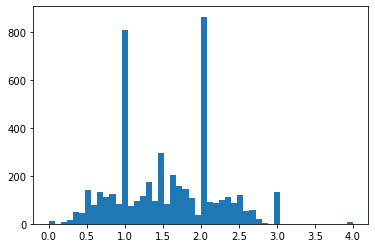

In [68]:
plt.hist(full_part_df_with_fmis_filtered['min_discussion_frac'], bins=50)

In [314]:
full_part_df_with_fmis_filtered.loc[full_part_df_with_fmis_filtered['min_discussion_diff'] > 0]

,TXN - Item ID,monthly_usage,leadtime_mean,recent_leadtime,leadtime_month_padding,leadtime_fortnight_padding,recent_leadtime_month_padding,recent_leadtime_fortnight_padding,mid_min,conservative_min,conservative_min_recent,3_month_roq,6_month_roq,12_month_roq,18_month_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_discussion_diff,min_discussion_diff_recent,min_discussion_frac,min_discussion_frac_recent
2,00176001,5.375000,0.033333,0.033333,1.033333,0.533333,1.033333,0.533333,3.0,6.0,5.554167,16.0,32.0,64.0,97.0,CS004,14.0,240.4402,10.0,10.0,20.0,10.0,10.445833,2.666667,2.880720
3,00207001,6.500000,0.653333,0.033333,1.653333,1.153333,1.033333,0.533333,7.0,11.0,6.716667,20.0,39.0,78.0,117.0,CS004,58.0,856.0800,12.0,17.0,29.0,9.0,13.283333,1.818182,2.977667
4,00250113,192.875000,1.773333,2.966667,2.773333,2.273333,3.966667,3.466667,438.0,535.0,765.070833,579.0,1157.0,2314.0,3472.0,CS004,500.0,56.4000,500.0,500.0,1000.0,44.0,-186.070833,1.082243,0.756793
5,00250125,106.250000,0.553333,0.600000,1.553333,1.053333,1.600000,1.100000,112.0,165.0,170.000000,319.0,638.0,1275.0,1912.0,CS004,1000.0,8388.0000,0.0,367.0,1000.0,154.0,149.000000,1.933333,1.876471
6,00250126,206.250000,1.580000,0.966667,2.580000,2.080000,1.966667,1.466667,429.0,532.0,405.625000,619.0,1238.0,2475.0,3712.0,CS004,2000.0,8500.0000,500.0,500.0,1500.0,87.0,213.375000,1.163534,1.526040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5368,44908070,1.291667,1.100000,1.033333,2.100000,1.600000,2.033333,1.533333,2.0,3.0,2.626389,4.0,8.0,16.0,23.0,CS004,43.0,335.8300,3.0,3.0,5.0,1.0,1.373611,1.333333,1.523004
5369,44908071,1.291667,1.566667,1.733333,2.566667,2.066667,2.733333,2.233333,3.0,3.0,3.530556,4.0,8.0,16.0,23.0,CS004,12.0,136.2000,2.0,2.0,4.0,1.0,0.469444,1.333333,1.132966
5373,45020001,6.458333,0.940000,0.366667,1.940000,1.440000,1.366667,0.866667,9.0,13.0,8.826389,19.0,39.0,78.0,116.0,CS004,5620.0,38282.8780,10.0,10.0,20.0,6.0,10.173611,1.461538,2.152636
5382,598742,1.291667,0.000000,0.000000,1.000000,0.500000,1.000000,0.500000,1.0,1.0,1.291667,4.0,8.0,16.0,23.0,CS003,0.0,0.0000,0.0,1.0,0.0,3.0,2.708333,4.000000,3.096774


In [315]:
full_part_df_with_fmis_filtered.loc[full_part_df_with_fmis_filtered['min_discussion_diff'] < 0]

,TXN - Item ID,monthly_usage,leadtime_mean,recent_leadtime,leadtime_month_padding,leadtime_fortnight_padding,recent_leadtime_month_padding,recent_leadtime_fortnight_padding,mid_min,conservative_min,conservative_min_recent,3_month_roq,6_month_roq,12_month_roq,18_month_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_discussion_diff,min_discussion_diff_recent,min_discussion_frac,min_discussion_frac_recent
0,00170009,10.833333,2.233333,0.266667,3.233333,2.733333,1.266667,0.766667,30.0,35.0,13.722222,32.0,65.0,130.0,195.0,CS004,100.0,282.0000,0.0,0.0,1.0,-3.0,18.277778,0.914286,2.331984
12,00901026,32.875000,5.706667,5.766667,6.706667,6.206667,6.766667,6.266667,204.0,220.0,222.454167,99.0,197.0,394.0,592.0,CS004,72.0,47449.2312,297.0,297.0,567.0,-121.0,-123.454167,0.450000,0.445035
13,00958001,15.250000,9.220000,14.433333,10.220000,9.720000,15.433333,14.933333,148.0,156.0,235.358333,46.0,92.0,183.0,274.0,CS004,222.0,207434.8908,160.0,160.0,320.0,-110.0,-189.358333,0.294872,0.195447
14,00976001,8.083333,5.586667,3.966667,6.586667,6.086667,4.966667,4.466667,49.0,53.0,40.147222,24.0,48.0,97.0,146.0,CS004,330.0,295394.6160,200.0,200.0,400.0,-29.0,-16.147222,0.452830,0.597800
15,01076001,109.458333,2.006667,2.166667,3.006667,2.506667,3.166667,2.666667,274.0,329.0,346.618056,328.0,657.0,1314.0,1970.0,CS004,948.0,47885.4708,400.0,500.0,900.0,-1.0,-18.618056,0.996960,0.946287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5376,45050037,5.875000,2.793333,1.600000,3.793333,3.293333,2.600000,2.100000,19.0,22.0,15.275000,18.0,35.0,70.0,106.0,CS004,355.0,3141.7500,35.0,35.0,60.0,-4.0,2.725000,0.818182,1.178396
5377,45050114,3.166667,3.020000,2.800000,4.020000,3.520000,3.800000,3.300000,11.0,13.0,12.033333,10.0,19.0,38.0,57.0,CS004,50.0,6709.5000,4.0,4.0,12.0,-3.0,-2.033333,0.769231,0.831025
5378,45050129,1.416667,2.746667,2.900000,3.746667,3.246667,3.900000,3.400000,5.0,5.0,5.525000,4.0,8.0,17.0,26.0,CS004,12.0,2087.5512,12.0,12.0,36.0,-1.0,-1.525000,0.800000,0.723982
5379,45050130,2.000000,3.246667,3.866667,4.246667,3.746667,4.866667,4.366667,7.0,8.0,9.733333,6.0,12.0,24.0,36.0,CS004,65.0,8593.1170,40.0,40.0,80.0,-2.0,-3.733333,0.750000,0.616438


In [233]:
full_part_df_with_fmis_filtered.loc[full_part_df_with_fmis_filtered['min_discussion_frac'] == 2]

,TXN - Item ID,monthly_usage,leadtime_mean,leadtime_month_padding,leadtime_fortnight_padding,agg_min,mid_min,conservative_min,3_month_roq,6_month_roq,12_month_roq,18_month_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_discussion_diff,min_discussion_frac
33,02008050,0.583333,0.180000,1.180000,0.680000,0.0,0.0,1.0,2.0,4.0,7.0,10.0,CS004,1602.0,192.2400,156.0,350.0,506.0,1.0,2.0
77,02051170,1.500000,0.273333,1.273333,0.773333,0.0,1.0,2.0,4.0,9.0,18.0,27.0,CS004,2900.0,182.4100,75.0,227.0,350.0,2.0,2.0
98,02061008,2.083333,0.266667,1.266667,0.766667,1.0,2.0,3.0,6.0,12.0,25.0,38.0,CS004,287.0,85.6695,57.0,125.0,182.0,3.0,2.0
104,02063041,1.458333,0.420000,1.420000,0.920000,1.0,1.0,2.0,4.0,9.0,18.0,26.0,CS004,150.0,100.1700,0.0,1.0,1.0,2.0,2.0
112,02066003,0.708333,0.840000,1.840000,1.340000,1.0,1.0,1.0,2.0,4.0,8.0,13.0,CS004,246.0,752.7600,4.0,31.0,20.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5314,42609004,3.416667,0.453333,1.453333,0.953333,2.0,3.0,5.0,10.0,20.0,41.0,62.0,CS004,35.0,3210.1685,16.0,16.0,34.0,5.0,2.0
5318,42694105,5.416667,0.455556,1.455556,0.955556,2.0,5.0,8.0,16.0,32.0,65.0,98.0,CS004,24.0,184.1472,10.0,20.0,30.0,8.0,2.0
5343,43008084,0.500000,0.855556,1.855556,1.355556,0.0,1.0,1.0,2.0,3.0,6.0,9.0,CS004,995.0,1472.6000,48.0,55.0,103.0,1.0,2.0
5351,43096301,0.833333,0.000000,1.000000,0.500000,0.0,0.0,1.0,2.0,5.0,10.0,15.0,CS004,3279.0,13867.5468,3.0,9.0,12.0,1.0,2.0


In [234]:
full_part_df_with_fmis_filtered.loc[full_part_df_with_fmis_filtered['min_discussion_frac'] == 1]

,TXN - Item ID,monthly_usage,leadtime_mean,leadtime_month_padding,leadtime_fortnight_padding,agg_min,mid_min,conservative_min,3_month_roq,6_month_roq,12_month_roq,18_month_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_discussion_diff,min_discussion_frac
19,02001001,1.625000,2.320000,3.320000,2.820000,4.0,5.0,5.0,5.0,10.0,20.0,29.0,CS004,108.0,893.9916,50.0,53.0,100.0,0.0,1.0
41,02013027,0.375000,0.746667,1.746667,1.246667,0.0,0.0,1.0,1.0,2.0,4.0,7.0,CS004,49.0,67.1986,20.0,20.0,50.0,0.0,1.0
213,02112006,0.375000,0.393333,1.393333,0.893333,0.0,0.0,1.0,1.0,2.0,4.0,7.0,CS004,64.0,476.8000,10.0,17.0,27.0,0.0,1.0
275,02120205,0.750000,1.666667,2.666667,2.166667,1.0,2.0,2.0,2.0,4.0,9.0,14.0,CS004,6.0,88.0800,0.0,1.0,1.0,0.0,1.0
291,02130007,0.416667,0.513333,1.513333,1.013333,0.0,0.0,1.0,1.0,2.0,5.0,8.0,CS004,5.0,108.0000,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,44908001,0.208333,3.266667,4.266667,3.766667,1.0,1.0,1.0,1.0,1.0,2.0,4.0,CS004,32.0,6133.4400,2.0,2.0,4.0,0.0,1.0
5366,44908068,17.583333,2.000000,3.000000,2.500000,35.0,44.0,53.0,53.0,106.0,211.0,316.0,CS004,179.0,9807.9291,30.0,30.0,60.0,0.0,1.0
5367,44908069,2.375000,1.841667,2.841667,2.341667,4.0,6.0,7.0,7.0,14.0,28.0,43.0,CS004,5.0,136.7500,5.0,15.0,20.0,0.0,1.0
5372,45007001,0.500000,3.586667,4.586667,4.086667,2.0,2.0,2.0,2.0,3.0,6.0,9.0,CS004,0.0,0.0000,1.0,1.0,3.0,0.0,1.0


(0.0, 5.0)

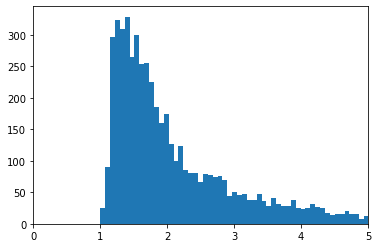

In [361]:
plt.hist(full_part_df_with_fmis_filtered['leadtime_month_padding'], bins=200)
plt.xlim(0, 5)

In [253]:
full_part_df_with_fmis_filtered.loc[full_part_df_with_fmis_filtered['leadtime_month_padding'] > 2]

,TXN - Item ID,monthly_usage,leadtime_mean,leadtime_month_padding,leadtime_fortnight_padding,agg_min,mid_min,conservative_min,3_month_roq,6_month_roq,12_month_roq,18_month_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_discussion_diff,min_discussion_frac
0,00170009,10.833333,2.233333,3.233333,2.733333,24.0,30.0,35.0,32.0,65.0,130.0,195.0,CS004,100.0,282.0000,0.0,0.0,1.0,-3.0,0.914286
4,00250113,192.875000,1.773333,2.773333,2.273333,342.0,438.0,535.0,579.0,1157.0,2314.0,3472.0,CS004,500.0,56.4000,500.0,500.0,1000.0,44.0,1.082243
6,00250126,206.250000,1.580000,2.580000,2.080000,326.0,429.0,532.0,619.0,1238.0,2475.0,3712.0,CS004,2000.0,8500.0000,500.0,500.0,1500.0,87.0,1.163534
7,00250128,104.166667,1.026667,2.026667,1.526667,107.0,159.0,211.0,312.0,625.0,1250.0,1875.0,CS004,3000.0,6120.0000,500.0,500.0,1500.0,101.0,1.478673
8,00250133,137.500000,1.266667,2.266667,1.766667,174.0,243.0,312.0,412.0,825.0,1650.0,2475.0,CS004,1500.0,945.0000,500.0,1000.0,1500.0,100.0,1.320513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5377,45050114,3.166667,3.020000,4.020000,3.520000,10.0,11.0,13.0,10.0,19.0,38.0,57.0,CS004,50.0,6709.5000,4.0,4.0,12.0,-3.0,0.769231
5378,45050129,1.416667,2.746667,3.746667,3.246667,4.0,5.0,5.0,4.0,8.0,17.0,26.0,CS004,12.0,2087.5512,12.0,12.0,36.0,-1.0,0.800000
5379,45050130,2.000000,3.246667,4.246667,3.746667,6.0,7.0,8.0,6.0,12.0,24.0,36.0,CS004,65.0,8593.1170,40.0,40.0,80.0,-2.0,0.750000
5380,45050134,1.416667,2.240000,3.240000,2.740000,3.0,4.0,5.0,4.0,8.0,17.0,26.0,CS004,20.0,278.6480,12.0,10.0,22.0,-1.0,0.800000


In [376]:
full_part_df_with_fmis_filtered['leadtime_month_padding'].mode()

0    1.4
Name: leadtime_month_padding, dtype: float64

In [377]:
full_part_df_with_fmis_filtered['leadtime_month_padding'].mean()

2.3110803220370726

In [378]:
full_part_df_with_fmis_filtered['leadtime_month_padding'].median()

1.8

3 month min captures 4000 out of 5000 parts. 

Leadtime-based min for parts with a leadtime of >3 months.

(array([208., 269., 568., 998., 354., 239., 140.,   0.,   0.,   9.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

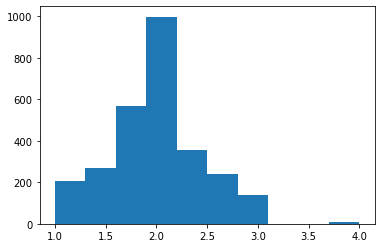

In [69]:
plt.hist(full_part_df_with_fmis_filtered.loc[full_part_df_with_fmis_filtered['leadtime_month_padding'] < 2]['min_discussion_frac'])

In [70]:
full_part_df_with_fmis_filtered

,TXN - Item ID,monthly_usage,leadtime_mean,recent_leadtime,leadtime_month_padding,leadtime_fortnight_padding,recent_leadtime_month_padding,recent_leadtime_fortnight_padding,mid_min,conservative_min,conservative_min_recent,2_month_roq,3_month_roq,6_month_roq,12_month_roq,18_month_roq,Base,Qty On Hand,On Hand Value,fmis_min,fmis_roq,Max Qty,min_discussion_diff,min_discussion_diff_recent,min_discussion_frac,min_discussion_frac_recent
0,00170009,10.833333,2.233333,0.266667,3.233333,2.733333,1.266667,0.766667,30.0,35.0,13.722222,22.0,32.0,65.0,130.0,195.0,CS004,100.0,282.0000,0.0,0.0,1.0,-3.0,18.277778,0.914286,2.331984
2,00176001,5.375000,0.033333,0.033333,1.033333,0.533333,1.033333,0.533333,3.0,6.0,5.554167,11.0,16.0,32.0,64.0,97.0,CS004,14.0,240.4402,10.0,10.0,20.0,10.0,10.445833,2.666667,2.880720
3,00207001,6.500000,0.653333,0.033333,1.653333,1.153333,1.033333,0.533333,7.0,11.0,6.716667,13.0,20.0,39.0,78.0,117.0,CS004,58.0,856.0800,12.0,17.0,29.0,9.0,13.283333,1.818182,2.977667
4,00250113,188.708333,1.773333,0.133333,2.773333,2.273333,1.133333,0.633333,429.0,523.0,213.869444,377.0,566.0,1132.0,2264.0,3397.0,CS004,500.0,56.4000,500.0,500.0,1000.0,43.0,352.130556,1.082218,2.646474
5,00250125,106.250000,0.553333,0.600000,1.553333,1.053333,1.600000,1.100000,112.0,165.0,170.000000,212.0,319.0,638.0,1275.0,1912.0,CS004,1000.0,8388.0000,0.0,367.0,1000.0,154.0,149.000000,1.933333,1.876471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5370,45050130,1.958333,3.426667,3.866667,4.426667,3.926667,4.866667,4.366667,8.0,9.0,9.530556,4.0,6.0,12.0,24.0,35.0,CS004,65.0,8593.1170,40.0,40.0,80.0,-3.0,-3.530556,0.666667,0.629554
5371,45050134,1.416667,2.240000,1.366667,3.240000,2.740000,2.366667,1.866667,4.0,5.0,3.352778,3.0,4.0,8.0,17.0,26.0,CS004,20.0,278.6480,12.0,10.0,22.0,-1.0,0.647222,0.800000,1.193041
5372,45050135,2.750000,1.813333,2.000000,2.813333,2.313333,3.000000,2.500000,6.0,8.0,8.250000,6.0,8.0,16.0,33.0,50.0,CS004,70.0,455.0000,8.0,8.0,16.0,0.0,-0.250000,1.000000,0.969697
5373,598742,1.291667,0.000000,0.000000,1.000000,0.500000,1.000000,0.500000,1.0,1.0,1.291667,3.0,4.0,8.0,16.0,23.0,CS003,0.0,0.0000,0.0,1.0,0.0,3.0,2.708333,4.000000,3.096774


In [80]:
full_part_min_sample = full_part_df_with_fmis_filtered[['TXN - Item ID', 'monthly_usage', 'leadtime_month_padding', 'conservative_min', '2_month_roq', '3_month_roq', 'Qty On Hand', 'On Hand Value', 'fmis_min', 'fmis_roq']]

In [81]:
full_part_min_sample

,TXN - Item ID,monthly_usage,leadtime_month_padding,conservative_min,2_month_roq,3_month_roq,Qty On Hand,On Hand Value,fmis_min,fmis_roq
0,00170009,10.833333,3.233333,35.0,22.0,32.0,100.0,282.0000,0.0,0.0
2,00176001,5.375000,1.033333,6.0,11.0,16.0,14.0,240.4402,10.0,10.0
3,00207001,6.500000,1.653333,11.0,13.0,20.0,58.0,856.0800,12.0,17.0
4,00250113,188.708333,2.773333,523.0,377.0,566.0,500.0,56.4000,500.0,500.0
5,00250125,106.250000,1.553333,165.0,212.0,319.0,1000.0,8388.0000,0.0,367.0
...,...,...,...,...,...,...,...,...,...,...
5370,45050130,1.958333,4.426667,9.0,4.0,6.0,65.0,8593.1170,40.0,40.0
5371,45050134,1.416667,3.240000,5.0,3.0,4.0,20.0,278.6480,12.0,10.0
5372,45050135,2.750000,2.813333,8.0,6.0,8.0,70.0,455.0000,8.0,8.0
5373,598742,1.291667,1.000000,1.0,3.0,4.0,0.0,0.0000,0.0,1.0


In [394]:
full_part_min_sample_low_lt = full_part_min_sample.loc[full_part_min_sample['leadtime_month_padding'] < 2]

In [395]:
full_part_min_sample_low_lt

,TXN - Item ID,monthly_usage,leadtime_month_padding,conservative_min,2_month_roq,3_month_roq,Qty On Hand,fmis_min
2,00176001,5.375000,1.033333,6.0,11.0,16.0,14.0,10.0
3,00207001,6.500000,1.653333,11.0,13.0,20.0,58.0,12.0
5,00250125,106.250000,1.553333,165.0,212.0,319.0,1000.0,0.0
9,00250134,759.166667,1.780000,1351.0,1518.0,2278.0,7260.0,500.0
10,00250135,250.083333,1.566667,392.0,500.0,750.0,3000.0,0.0
...,...,...,...,...,...,...,...,...
5354,43209002,1.625000,1.900000,3.0,3.0,5.0,3.0,6.0
5358,44908022,7.666667,1.853333,14.0,15.0,23.0,81.0,13.0
5373,45020001,6.458333,1.940000,13.0,13.0,19.0,5620.0,10.0
5382,598742,1.291667,1.000000,1.0,3.0,4.0,0.0,0.0


In [396]:
full_part_min_sample_low_lt['min_frac'] = full_part_min_sample_low_lt['3_month_roq'] / full_part_min_sample_low_lt['conservative_min']

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_12674/677520968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_part_min_sample_low_lt['min_frac'] = full_part_min_sample_low_lt['3_month_roq'] / full_part_min_sample_low_lt['conservative_min']


In [397]:
full_part_min_sample_low_lt['min_frac'] = np.where(full_part_min_sample_low_lt['min_frac'] == np.inf, 0, full_part_min_sample_low_lt['min_frac'])

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_12674/128678244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_part_min_sample_low_lt['min_frac'] = np.where(full_part_min_sample_low_lt['min_frac'] == np.inf, 0, full_part_min_sample_low_lt['min_frac'])


In [398]:
full_part_min_sample_low_lt

,TXN - Item ID,monthly_usage,leadtime_month_padding,conservative_min,2_month_roq,3_month_roq,Qty On Hand,fmis_min,min_frac
2,00176001,5.375000,1.033333,6.0,11.0,16.0,14.0,10.0,2.666667
3,00207001,6.500000,1.653333,11.0,13.0,20.0,58.0,12.0,1.818182
5,00250125,106.250000,1.553333,165.0,212.0,319.0,1000.0,0.0,1.933333
9,00250134,759.166667,1.780000,1351.0,1518.0,2278.0,7260.0,500.0,1.686158
10,00250135,250.083333,1.566667,392.0,500.0,750.0,3000.0,0.0,1.913265
...,...,...,...,...,...,...,...,...,...
5354,43209002,1.625000,1.900000,3.0,3.0,5.0,3.0,6.0,1.666667
5358,44908022,7.666667,1.853333,14.0,15.0,23.0,81.0,13.0,1.642857
5373,45020001,6.458333,1.940000,13.0,13.0,19.0,5620.0,10.0,1.461538
5382,598742,1.291667,1.000000,1.0,3.0,4.0,0.0,0.0,4.000000


(array([ 250.,    0.,  210.,  247.,  645., 1252.,  302.,  133.,    0.,
          10.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

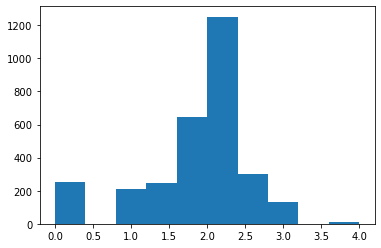

In [399]:
plt.hist(full_part_min_sample_low_lt['min_frac'])

In [400]:
full_part_min_sample_low_lt['final_min'] = np.where(full_part_min_sample_low_lt['leadtime_month_padding'] < 2,
                                                    full_part_min_sample_low_lt['2_month_roq'], 
                                                    full_part_min_sample_low_lt['3_month_roq']).round()

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_12674/4083142186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_part_min_sample_low_lt['final_min'] = np.where(full_part_min_sample_low_lt['leadtime_month_padding'] < 2,


In [401]:
full_part_min_sample_low_lt

,TXN - Item ID,monthly_usage,leadtime_month_padding,conservative_min,2_month_roq,3_month_roq,Qty On Hand,fmis_min,min_frac,final_min
2,00176001,5.375000,1.033333,6.0,11.0,16.0,14.0,10.0,2.666667,11.0
3,00207001,6.500000,1.653333,11.0,13.0,20.0,58.0,12.0,1.818182,13.0
5,00250125,106.250000,1.553333,165.0,212.0,319.0,1000.0,0.0,1.933333,212.0
9,00250134,759.166667,1.780000,1351.0,1518.0,2278.0,7260.0,500.0,1.686158,1518.0
10,00250135,250.083333,1.566667,392.0,500.0,750.0,3000.0,0.0,1.913265,500.0
...,...,...,...,...,...,...,...,...,...,...
5354,43209002,1.625000,1.900000,3.0,3.0,5.0,3.0,6.0,1.666667,3.0
5358,44908022,7.666667,1.853333,14.0,15.0,23.0,81.0,13.0,1.642857,15.0
5373,45020001,6.458333,1.940000,13.0,13.0,19.0,5620.0,10.0,1.461538,13.0
5382,598742,1.291667,1.000000,1.0,3.0,4.0,0.0,0.0,4.000000,3.0


In [402]:
full_part_min_sample_low_lt['final_min_frac'] = full_part_min_sample_low_lt['3_month_roq'] / full_part_min_sample_low_lt['final_min']

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_12674/3994672333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_part_min_sample_low_lt['final_min_frac'] = full_part_min_sample_low_lt['3_month_roq'] / full_part_min_sample_low_lt['final_min']


In [411]:
full_part_min_sample_low_lt = full_part_min_sample_low_lt.replace([np.inf, -np.inf], np.nan).fillna(0)

(array([ 212.,    0.,    0.,    0.,    0.,  451.,  267., 1627.,  245.,
         331.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

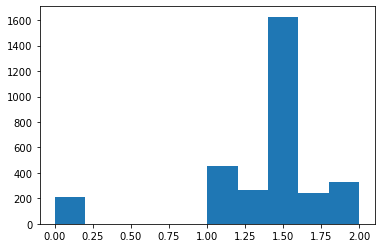

In [412]:
plt.hist(full_part_min_sample_low_lt['final_min_frac'])

In [ ]:
# Cuts of 50%

In [82]:
full_part_min_sample['final_min'] = np.where(full_part_min_sample['leadtime_month_padding'] <= 3,
                                                full_part_min_sample['3_month_roq'], 
                                                full_part_min_sample['conservative_min']).round()

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_86237/2718703039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_part_min_sample['final_min'] = np.where(full_part_min_sample['leadtime_month_padding'] <= 3,


In [83]:
full_part_min_sample

,TXN - Item ID,monthly_usage,leadtime_month_padding,conservative_min,2_month_roq,3_month_roq,Qty On Hand,On Hand Value,fmis_min,fmis_roq,final_min
0,00170009,10.833333,3.233333,35.0,22.0,32.0,100.0,282.0000,0.0,0.0,35.0
2,00176001,5.375000,1.033333,6.0,11.0,16.0,14.0,240.4402,10.0,10.0,16.0
3,00207001,6.500000,1.653333,11.0,13.0,20.0,58.0,856.0800,12.0,17.0,20.0
4,00250113,188.708333,2.773333,523.0,377.0,566.0,500.0,56.4000,500.0,500.0,566.0
5,00250125,106.250000,1.553333,165.0,212.0,319.0,1000.0,8388.0000,0.0,367.0,319.0
...,...,...,...,...,...,...,...,...,...,...,...
5370,45050130,1.958333,4.426667,9.0,4.0,6.0,65.0,8593.1170,40.0,40.0,9.0
5371,45050134,1.416667,3.240000,5.0,3.0,4.0,20.0,278.6480,12.0,10.0,5.0
5372,45050135,2.750000,2.813333,8.0,6.0,8.0,70.0,455.0000,8.0,8.0,8.0
5373,598742,1.291667,1.000000,1.0,3.0,4.0,0.0,0.0000,0.0,1.0,4.0


(0.0, 6.0)

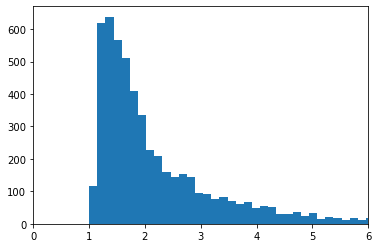

In [470]:
# Leadtime histogram
plt.hist(full_part_min_sample['leadtime_month_padding'], bins=100)
plt.xlim(0, 6)

In [479]:
full_part_min_sample

,TXN - Item ID,monthly_usage,leadtime_month_padding,conservative_min,2_month_roq,3_month_roq,Qty On Hand,fmis_min,fmis_roq,final_min,6_month_roq
0,00170009,10.833333,3.233333,35.0,22.0,32.0,100.0,0.0,0.0,35.0,65.0
2,00176001,5.375000,1.033333,6.0,11.0,16.0,14.0,10.0,10.0,16.0,32.0
3,00207001,6.500000,1.653333,11.0,13.0,20.0,58.0,12.0,17.0,20.0,39.0
4,00250113,192.875000,2.773333,535.0,386.0,579.0,500.0,500.0,500.0,579.0,1157.0
5,00250125,106.250000,1.553333,165.0,212.0,319.0,1000.0,0.0,367.0,319.0,638.0
...,...,...,...,...,...,...,...,...,...,...,...
5379,45050130,2.000000,4.246667,8.0,4.0,6.0,65.0,40.0,40.0,8.0,12.0
5380,45050134,1.416667,3.240000,5.0,3.0,4.0,20.0,12.0,10.0,5.0,8.0
5381,45050135,2.791667,2.813333,8.0,6.0,8.0,70.0,8.0,8.0,8.0,17.0
5382,598742,1.291667,1.000000,1.0,3.0,4.0,0.0,0.0,1.0,4.0,8.0


In [84]:
full_part_min_sample['6_month_roq'] = full_part_df_with_fmis_filtered['6_month_roq']

/var/folders/73/z_zg2ww102j_zl0j1rp57xxcwgxbxw/T/ipykernel_86237/1587194416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_part_min_sample['6_month_roq'] = full_part_df_with_fmis_filtered['6_month_roq']


In [85]:
full_part_min_sample

,TXN - Item ID,monthly_usage,leadtime_month_padding,conservative_min,2_month_roq,3_month_roq,Qty On Hand,On Hand Value,fmis_min,fmis_roq,final_min,6_month_roq
0,00170009,10.833333,3.233333,35.0,22.0,32.0,100.0,282.0000,0.0,0.0,35.0,65.0
2,00176001,5.375000,1.033333,6.0,11.0,16.0,14.0,240.4402,10.0,10.0,16.0,32.0
3,00207001,6.500000,1.653333,11.0,13.0,20.0,58.0,856.0800,12.0,17.0,20.0,39.0
4,00250113,188.708333,2.773333,523.0,377.0,566.0,500.0,56.4000,500.0,500.0,566.0,1132.0
5,00250125,106.250000,1.553333,165.0,212.0,319.0,1000.0,8388.0000,0.0,367.0,319.0,638.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5370,45050130,1.958333,4.426667,9.0,4.0,6.0,65.0,8593.1170,40.0,40.0,9.0,12.0
5371,45050134,1.416667,3.240000,5.0,3.0,4.0,20.0,278.6480,12.0,10.0,5.0,8.0
5372,45050135,2.750000,2.813333,8.0,6.0,8.0,70.0,455.0000,8.0,8.0,8.0,16.0
5373,598742,1.291667,1.000000,1.0,3.0,4.0,0.0,0.0000,0.0,1.0,4.0,8.0


In [86]:
print(len(full_part_min_sample.loc[full_part_min_sample['leadtime_month_padding'] <= 3]))
print(len(full_part_min_sample.loc[full_part_min_sample['leadtime_month_padding'] < 2]))

3898
2785


In [87]:
print(len(full_part_min_sample.loc[full_part_min_sample['leadtime_month_padding'] > 3]))

1035


In [88]:
print(full_part_min_sample.loc[full_part_min_sample['final_min'] == full_part_min_sample['3_month_roq']])

     TXN - Item ID  monthly_usage  leadtime_month_padding  conservative_min  \
2         00176001       5.375000                1.033333               6.0   
3         00207001       6.500000                1.653333              11.0   
4         00250113     188.708333                2.773333             523.0   
5         00250125     106.250000                1.553333             165.0   
6         00250126     206.250000                2.580000             532.0   
...            ...            ...                     ...               ...   
5363      45007001       0.500000                4.586667               2.0   
5364      45020001       6.458333                1.940000              13.0   
5372      45050135       2.750000                2.813333               8.0   
5373        598742       1.291667                1.000000               1.0   
5374        602692       0.833333                1.000000               1.0   

      2_month_roq  3_month_roq  Qty On Hand  On Han

In [89]:
print(full_part_min_sample.loc[full_part_min_sample['final_min'] == full_part_min_sample['2_month_roq']])

     TXN - Item ID  monthly_usage  leadtime_month_padding  conservative_min  \
41        02013027       0.375000                1.746667               1.0   
152       02090056       0.791667                2.313333               2.0   
213       02112006       0.375000                1.393333               1.0   
290       02130006       0.791667                1.520000               1.0   
291       02130007       0.416667                1.513333               1.0   
...            ...            ...                     ...               ...   
5269      42519138       0.416667                1.340000               1.0   
5294      42608025       0.333333                2.741667               1.0   
5304      42608050       0.458333                2.266667               1.0   
5342      43096301       0.833333                1.000000               1.0   
5374        602692       0.833333                1.000000               1.0   

      2_month_roq  3_month_roq  Qty On Hand  On Han

In [90]:
print(full_part_min_sample.loc[full_part_min_sample['2_month_roq'] == full_part_min_sample['3_month_roq']])

     TXN - Item ID  monthly_usage  leadtime_month_padding  conservative_min  \
41        02013027       0.375000                1.746667               1.0   
152       02090056       0.791667                2.313333               2.0   
213       02112006       0.375000                1.393333               1.0   
290       02130006       0.791667                1.520000               1.0   
291       02130007       0.416667                1.513333               1.0   
...            ...            ...                     ...               ...   
5352      44908033       0.833333                5.026667               4.0   
5355      44908039       0.458333                4.506667               2.0   
5361      44908072       0.833333                3.933333               3.0   
5366      45050017       0.166667                3.466667               1.0   
5374        602692       0.833333                1.000000               1.0   

      2_month_roq  3_month_roq  Qty On Hand  On Han

In [474]:
full_part_min_sample

,TXN - Item ID,monthly_usage,leadtime_month_padding,conservative_min,2_month_roq,3_month_roq,Qty On Hand,fmis_min,fmis_roq,final_min,6_month_roq
0,00170009,10.833333,3.233333,35.0,22.0,32.0,100.0,0.0,0.0,35.0,65.0
2,00176001,5.375000,1.033333,6.0,11.0,16.0,14.0,10.0,10.0,11.0,32.0
3,00207001,6.500000,1.653333,11.0,13.0,20.0,58.0,12.0,17.0,13.0,39.0
4,00250113,192.875000,2.773333,535.0,386.0,579.0,500.0,500.0,500.0,579.0,1157.0
5,00250125,106.250000,1.553333,165.0,212.0,319.0,1000.0,0.0,367.0,212.0,638.0
...,...,...,...,...,...,...,...,...,...,...,...
5379,45050130,2.000000,4.246667,8.0,4.0,6.0,65.0,40.0,40.0,8.0,12.0
5380,45050134,1.416667,3.240000,5.0,3.0,4.0,20.0,12.0,10.0,5.0,8.0
5381,45050135,2.791667,2.813333,8.0,6.0,8.0,70.0,8.0,8.0,8.0,17.0
5382,598742,1.291667,1.000000,1.0,3.0,4.0,0.0,0.0,1.0,3.0,8.0


In [91]:
full_part_export = full_part_min_sample.drop(['conservative_min', '2_month_roq', '3_month_roq'], axis=1)

In [93]:
item_group_key = txn_df[['TXN - Item ID', 'TXN - Item Group']].drop_duplicates()

In [94]:
full_part_export = full_part_export.merge(item_group_key, how='left', on='TXN - Item ID')

In [95]:
full_part_export

,TXN - Item ID,monthly_usage,leadtime_month_padding,Qty On Hand,On Hand Value,fmis_min,fmis_roq,final_min,6_month_roq,TXN - Item Group
0,00170009,10.833333,3.233333,100.0,282.0000,0.0,0.0,35.0,65.0,00
1,00176001,5.375000,1.033333,14.0,240.4402,10.0,10.0,16.0,32.0,76
2,00207001,6.500000,1.653333,58.0,856.0800,12.0,17.0,20.0,39.0,73
3,00250113,188.708333,2.773333,500.0,56.4000,500.0,500.0,566.0,1132.0,00
4,00250125,106.250000,1.553333,1000.0,8388.0000,0.0,367.0,319.0,638.0,00
...,...,...,...,...,...,...,...,...,...,...
4985,45050130,1.958333,4.426667,65.0,8593.1170,40.0,40.0,9.0,12.0,73
4986,45050134,1.416667,3.240000,20.0,278.6480,12.0,10.0,5.0,8.0,73
4987,45050135,2.750000,2.813333,70.0,455.0000,8.0,8.0,8.0,16.0,73
4988,598742,1.291667,1.000000,0.0,0.0000,0.0,1.0,4.0,8.0,82


In [98]:
full_part_export['unit_cost'] = full_part_export['On Hand Value'] / full_part_export['Qty On Hand']
full_part_export['unit_cost'] = full_part_export['unit_cost'].fillna(0)

In [99]:
full_part_export

,TXN - Item ID,monthly_usage,leadtime_month_padding,Qty On Hand,On Hand Value,fmis_min,fmis_roq,final_min,6_month_roq,TXN - Item Group,unit_cost
0,00170009,10.833333,3.233333,100.0,282.0000,0.0,0.0,35.0,65.0,00,2.8200
1,00176001,5.375000,1.033333,14.0,240.4402,10.0,10.0,16.0,32.0,76,17.1743
2,00207001,6.500000,1.653333,58.0,856.0800,12.0,17.0,20.0,39.0,73,14.7600
3,00250113,188.708333,2.773333,500.0,56.4000,500.0,500.0,566.0,1132.0,00,0.1128
4,00250125,106.250000,1.553333,1000.0,8388.0000,0.0,367.0,319.0,638.0,00,8.3880
...,...,...,...,...,...,...,...,...,...,...,...
4985,45050130,1.958333,4.426667,65.0,8593.1170,40.0,40.0,9.0,12.0,73,132.2018
4986,45050134,1.416667,3.240000,20.0,278.6480,12.0,10.0,5.0,8.0,73,13.9324
4987,45050135,2.750000,2.813333,70.0,455.0000,8.0,8.0,8.0,16.0,73,6.5000
4988,598742,1.291667,1.000000,0.0,0.0000,0.0,1.0,4.0,8.0,82,0.0000


In [101]:
full_part_export_str = full_part_export.copy(deep=True)

In [102]:
full_part_export_str['TXN - Item ID'] = '"' + full_part_export_str['TXN - Item ID'] + '"'
full_part_export_str['TXN - Item Group'] = '"' + full_part_export_str['TXN - Item Group'] + '"'

In [109]:
#full_part_export.to_csv('Data/main_parts_recommendation_for_takary.csv', quoting=csv.QUOTE_NONNUMERIC)
full_part_export.to_excel('Data/main_parts_recommendation_for_takary.xlsx')

#### TODO: Get the calculated values for the other 8,000 parts. 

Also get Base Min/maxes

1 Month / 2 Month

Base Table: Historical usage, 2 months, unit cost, total cost

### 5/16/22

In [499]:
full_part_export

,TXN - Item ID,monthly_usage,leadtime_month_padding,Qty On Hand,fmis_min,fmis_roq,final_min,6_month_roq,TXN - Item Group
0,00170009,10.833333,3.233333,100.0,0.0,0.0,35.0,65.0,00
1,00176001,5.375000,1.033333,14.0,10.0,10.0,16.0,32.0,76
2,00207001,6.500000,1.653333,58.0,12.0,17.0,20.0,39.0,73
3,00250113,192.875000,2.773333,500.0,500.0,500.0,579.0,1157.0,00
4,00250125,106.250000,1.553333,1000.0,0.0,367.0,319.0,638.0,00
...,...,...,...,...,...,...,...,...,...
5395,45050130,2.000000,4.246667,65.0,40.0,40.0,8.0,12.0,73
5396,45050134,1.416667,3.240000,20.0,12.0,10.0,5.0,8.0,73
5397,45050135,2.791667,2.813333,70.0,8.0,8.0,8.0,17.0,73
5398,598742,1.291667,1.000000,0.0,0.0,1.0,4.0,8.0,82


In [500]:
increased_skus = full_part_export.copy(deep=True)

In [503]:
increased_skus['pct_increase'] = (increased_skus['final_min'] - increased_skus['fmis_min']) / increased_skus['fmis_min'] * 100

In [517]:
increased_skus['pct_increase'] = increased_skus['pct_increase'].replace([np.inf, -np.inf], np.nan)
increased_skus = increased_skus.dropna()

In [518]:
increased_skus

,TXN - Item ID,monthly_usage,leadtime_month_padding,Qty On Hand,fmis_min,fmis_roq,final_min,6_month_roq,TXN - Item Group,pct_increase
1,00176001,5.375000,1.033333,14.0,10.0,10.0,16.0,32.0,76,60.000000
2,00207001,6.500000,1.653333,58.0,12.0,17.0,20.0,39.0,73,66.666667
3,00250113,192.875000,2.773333,500.0,500.0,500.0,579.0,1157.0,00,15.800000
5,00250126,206.250000,2.580000,2000.0,500.0,500.0,619.0,1238.0,74,23.800000
6,00250128,104.166667,2.026667,3000.0,500.0,500.0,312.0,625.0,00,-37.600000
...,...,...,...,...,...,...,...,...,...,...
5394,45050129,1.416667,3.746667,12.0,12.0,12.0,5.0,8.0,73,-58.333333
5395,45050130,2.000000,4.246667,65.0,40.0,40.0,8.0,12.0,73,-80.000000
5396,45050134,1.416667,3.240000,20.0,12.0,10.0,5.0,8.0,73,-58.333333
5397,45050135,2.791667,2.813333,70.0,8.0,8.0,8.0,17.0,73,0.000000


(array([4.494e+03, 4.500e+01, 6.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-100.,  415.,  930., 1445., 1960., 2475., 2990., 3505., 4020.,
        4535., 5050.]),
 <BarContainer object of 10 artists>)

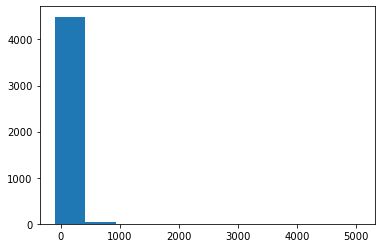

In [519]:
plt.hist(increased_skus['pct_increase'])

In [521]:
increased_skus.sort_values(by='pct_increase', ascending=False)[0:50]

,TXN - Item ID,monthly_usage,leadtime_month_padding,Qty On Hand,fmis_min,fmis_roq,final_min,6_month_roq,TXN - Item Group,pct_increase
2683,03280444,28.000000,3.666667,30.0,2.0,2.0,103.0,168.0,72,5050.000000
5006,31407066,33.583333,1.206667,77.0,6.0,9.0,101.0,202.0,00,1583.333333
2205,02794015,10.541667,1.653333,54.0,2.0,2.0,32.0,63.0,94,1500.000000
5101,31469155,4.583333,1.546667,12.0,1.0,1.0,14.0,28.0,00,1300.000000
2682,03280434,26.791667,1.533333,200.0,6.0,12.0,80.0,161.0,72,1233.333333
4803,15155001,35.500000,1.166667,480.0,8.0,19.0,106.0,213.0,00,1225.000000
1834,02690132,8.625000,1.400000,105.0,2.0,5.0,26.0,52.0,94,1200.000000
4925,31047033,65.625000,1.740000,400.0,18.0,44.0,197.0,394.0,00,994.444444
2757,03401635,17.250000,1.806667,308.0,5.0,8.0,52.0,104.0,72,940.000000
1169,02576261,14.625000,4.140000,0.0,6.0,6.0,61.0,88.0,76,916.666667


In [531]:
len(full_part_export.loc[full_part_export['final_min'] > full_part_export['fmis_min']])

2128

In [534]:
len(full_part_export.loc[(full_part_export['final_min'] > full_part_export['fmis_min']) & (full_part_export['fmis_min'] != 0)])

1329

In [540]:
len(full_part_export)

5400

In [532]:
len(full_part_export.loc[full_part_export['final_min'] > full_part_export['fmis_min']]) / len(full_part_export)

0.3940740740740741

In [522]:
len(increased_skus.loc[increased_skus['pct_increase'] > 0])

1329

In [523]:
len(increased_skus)

4548

In [538]:
len(increased_skus.loc[increased_skus['pct_increase'] > 15])

1148

In [536]:
len(increased_skus.loc[increased_skus['pct_increase'] > 100])

349

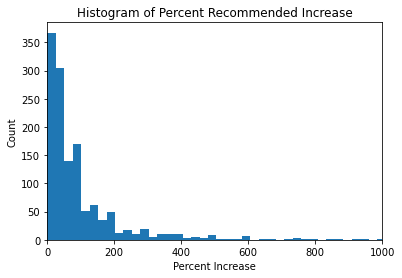

In [543]:
plt.hist(increased_skus.loc[increased_skus['pct_increase'] > 0.10]['pct_increase'], bins=200)
plt.xlim(0, 1000)
plt.xlabel('Percent Increase')
plt.ylabel('Count')
plt.title('Histogram of Percent Recommended Increase')

plt.savefig('pct_increase_hist.jpg')

In [539]:
len(increased_skus.loc[increased_skus['pct_increase'] > 500])

36